In [1]:
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
runLocationFile = open("runlocation.txt")
runLocation = runLocationFile.readline()

df = pd.DataFrame()
for root, dirs, files in os.walk(runLocation):
    for name in files:
        if name.endswith(".run"):
            f = open(root + '/' + name)
            temp_run = f.readline()
            f.close()
            temp_dict = json.loads(temp_run)
            temp_dataFrame = pd.DataFrame([temp_dict])
            df = pd.concat([df, temp_dataFrame], ignore_index= True)

In [3]:
df.head()

,gold_per_floor,floor_reached,playtime,items_purged,score,play_id,local_time,is_ascension_mode,campfire_choices,neow_cost,...,event_choices,is_beta,boss_relics,items_purged_floors,is_endless,potions_floor_spawned,killed_by,ascension_level,special_seed,daily_mods
0,"[113, 130, 12, 12, 26, 26, 53, 53, 53, 69, 92,...",16,451,[Clash],216,f54f60e6-8ba3-4c7a-9e52-0ad9a61fe447,20220718170453,True,"[{'data': 'Inflame', 'floor': 6, 'key': 'SMITH...",TEN_PERCENT_HP_LOSS,...,"[{'damage_healed': 0, 'gold_gain': 0, 'player_...",False,[],[3],False,"[1, 10, 11]",Hexaghost,20,NaN,NaN
1,"[119, 138, 155, 155, 155, 188, 188, 199, 224, ...",51,2629,[Fire Breathing],1667,27f8c62f-e147-49a3-bf6b-eccc3bbaf7b3,20240501191739,True,"[{'floor': 7.0, 'key': 'REST'}, {'floor': 15.0...",NONE,...,"[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,"[{'not_picked': ['Runic Dome', 'Philosopher's ...",[36],False,"[1, 2, 8, 14, 16, 21, 24, 27, 30, 31, 33, 35, ...",Donu and Deca,20,0.0,NaN
2,"[20, 70, 84, 95, 112, 112, 125, 125, 172, 207,...",23,755,[Strike_R],410,71eca2be-bde1-4a59-b699-b2256511217d,20220423073516,True,"[{'data': 'Uppercut', 'floor': 6, 'key': 'SMIT...",NO_GOLD,...,"[{'damage_healed': 0, 'gold_gain': 50, 'player...",False,"[{'not_picked': ['Empty Cage', 'Sozu'], 'picke...",[20],False,"[3, 4, 16, 21]",Book of Stabbing,20,NaN,NaN
3,"[369, 18, 28, 28, 43, 76, 76, 101, 101, 101, 1...",40,1499,"[Strike_R, Normality]",956,a4b5a97b-d652-4bbc-bba5-d491ca379521,20220724223004,True,"[{'data': 'Bash', 'floor': 7.0, 'key': 'SMITH'...",TEN_PERCENT_HP_LOSS,...,"[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,"[{'not_picked': ['Runic Pyramid', 'Mark of Pai...","[19, 38]",False,"[5, 6, 8, 11, 14, 18, 22, 23, 28, 30, 31, 37]",Giant Head,20,0.0,NaN
4,"[216, 228, 10, 30, 50, 50, 82, 99, 99, 125, 14...",16,627,[],252,7e3796ad-0f20-4779-899e-d940d5d1e229,20240417143139,True,"[{'data': 'Perfected Strike', 'floor': 6.0, 'k...",NONE,...,[],False,[],[],False,"[4, 5, 7, 12]",The Guardian,20,0.0,NaN


In [4]:
# Filter for ascension 20 
asc_20_mask = df['ascension_level'] == 20
df = df[asc_20_mask]

In [5]:
ironclad_mask = df['character_chosen'] == 'IRONCLAD'
silent_mask = df['character_chosen'] == 'THE_SILENT'
defect_mask = df['character_chosen'] == 'DEFECT'
watcher_mask = df['character_chosen'] == 'WATCHER'

ironclad_df = df[ironclad_mask]
silent_df = df[silent_mask]
defect_df = df[defect_mask]
watcher_df = df[watcher_mask]


In [6]:
ironclad_df.shape

(823, 52)

In [7]:
silent_df.shape

(1432, 52)

In [8]:
defect_df.shape

(2969, 52)

In [9]:
watcher_df.shape

(264, 52)

In [10]:
gold_per_floor_winning = []
ironclad_gold_per_floor_winning = []
silent_gold_per_floor_winning = []
defect_gold_per_floor_winning = []
watcher_gold_per_floor_winning = []

In [11]:
for i in range(df.shape[0]): 
    floor_reached_index = df.columns.get_loc('floor_reached')
    if df.iloc[i, floor_reached_index] == 57: 
        gold_per_floor_col_index = df.columns.get_loc('gold_per_floor')
        tmp_list = df.iloc[i,gold_per_floor_col_index]
        gold_per_floor_winning.append(tmp_list)
        char_chosen_col_index = df.columns.get_loc('character_chosen')
        char_chosen = df.iloc[i, char_chosen_col_index]
        if char_chosen == 'IRONCLAD':
            ironclad_gold_per_floor_winning.append(tmp_list)
        elif char_chosen == 'THE_SILENT': 
            silent_gold_per_floor_winning.append(tmp_list)
        elif char_chosen == 'DEFECT':
            defect_gold_per_floor_winning.append(tmp_list)
        else : 
            watcher_gold_per_floor_winning.append(tmp_list)

In [12]:
# The * operator 'unpacks' a list, that is to say that it passes all elements of the iterable into the function
# in this case all sub-lists, from list_of_lists, are passed as arguments in the zip function
# This results in a zip object where every ith element of the zip object contains the ith element of 
# each of the sub-list 
def average_gold_per_floor(list_of_lists): 
    average = [sum(sub_list) / len(sub_list) for sub_list in zip(*list_of_lists)]
    return average

def max_gold_per_floor(list_of_lists): 
    max_list = [max(sub_list) for sub_list in zip(*list_of_lists)]
    return max_list

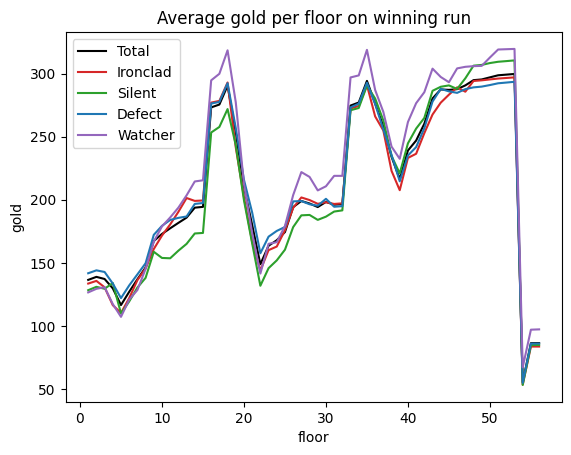

In [13]:
total_average_gold_per_floor_winning = average_gold_per_floor(gold_per_floor_winning)
average_ironclad_gold_per_floor_winning = average_gold_per_floor(ironclad_gold_per_floor_winning)
average_silent_gold_per_floor_winning = average_gold_per_floor(silent_gold_per_floor_winning)
average_defect_gold_per_floor_winning = average_gold_per_floor(defect_gold_per_floor_winning)
average_watcher_gold_per_floor_winning = average_gold_per_floor(watcher_gold_per_floor_winning)


floor_list_index = [i for i in range(1,57)]
plt.plot(floor_list_index, total_average_gold_per_floor_winning, 'k', label = 'Total')
plt.plot(floor_list_index, average_ironclad_gold_per_floor_winning, 'tab:red', label = 'Ironclad')
plt.plot(floor_list_index, average_silent_gold_per_floor_winning, 'tab:green', label = 'Silent')
plt.plot(floor_list_index, average_defect_gold_per_floor_winning, 'tab:blue', label = 'Defect')
plt.plot(floor_list_index, average_watcher_gold_per_floor_winning, 'tab:purple', label = 'Watcher')
plt.legend()
plt.ylabel('gold')
plt.xlabel('floor')
plt.title('Average gold per floor on winning run')
plt.show()

# add legend, axes labels, title later

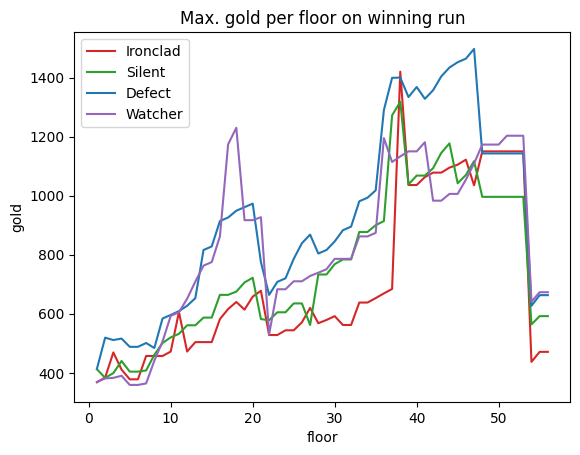

In [14]:
max_ironclad_gold_per_floor_winning = max_gold_per_floor(ironclad_gold_per_floor_winning)
max_silent_gold_per_floor_winning = max_gold_per_floor(silent_gold_per_floor_winning)
max_defect_gold_per_floor_winning = max_gold_per_floor(defect_gold_per_floor_winning)
max_watcher_gold_per_floor_winning = max_gold_per_floor(watcher_gold_per_floor_winning)

plt.plot(floor_list_index, max_ironclad_gold_per_floor_winning, 'tab:red', label = 'Ironclad')
plt.plot(floor_list_index, max_silent_gold_per_floor_winning, 'tab:green', label = 'Silent')
plt.plot(floor_list_index, max_defect_gold_per_floor_winning, 'tab:blue', label = 'Defect')
plt.plot(floor_list_index, max_watcher_gold_per_floor_winning, 'tab:purple', label = 'Watcher')
plt.legend()
plt.ylabel('gold')
plt.xlabel('floor')
plt.title('Max. gold per floor on winning run')
plt.show()
# add legend, axes labels, title later
# The graph shouldn't be a line, scatter plot??? or the graphs with points joined by lines. 
# Don't know what they are called

In [15]:
# make all the lists in the gold_per_floor column of length 56, 
# the max no. of floors. Enable calculation of average gold per floor
def to_max_floor_length(df): 
    max_floor = 56
    to_max_floor = lambda x: x + [0 for i in range(max_floor - len(x))]
    df['gold_per_floor'] = df['gold_per_floor'].apply(to_max_floor)

to_max_floor_length(df)

In [16]:
total_gold_per_floor = []
ironclad_gold_per_floor = []
silent_gold_per_floor = []
defect_gold_per_floor = []
watcher_gold_per_floor = []

In [17]:
# get average gold per floor for all runs
for i in range(df.shape[0]): 
    gold_per_floor_col_index = df.columns.get_loc('gold_per_floor')
    tmp_list = df.iloc[i,gold_per_floor_col_index]
    total_gold_per_floor.append(tmp_list)
    char_chosen_col_index = df.columns.get_loc('character_chosen')
    char_chosen = df.iloc[i, char_chosen_col_index]
    if char_chosen == 'IRONCLAD':
        ironclad_gold_per_floor.append(tmp_list)
    elif char_chosen == 'THE_SILENT': 
        silent_gold_per_floor.append(tmp_list)
    elif char_chosen == 'DEFECT':
        defect_gold_per_floor.append(tmp_list)
    else : 
        watcher_gold_per_floor.append(tmp_list)

In [18]:
total_average_gold_per_floor = average_gold_per_floor(total_gold_per_floor)
average_ironclad_gold_per_floor = average_gold_per_floor(ironclad_gold_per_floor)
average_silent_gold_per_floor = average_gold_per_floor(silent_gold_per_floor)
average_defect_gold_per_floor = average_gold_per_floor(defect_gold_per_floor)
average_watcher_gold_per_floor = average_gold_per_floor(watcher_gold_per_floor)

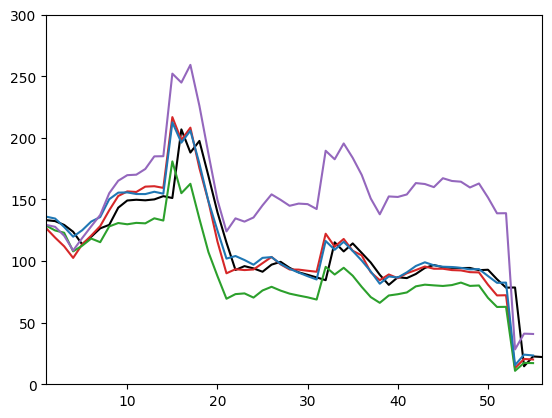

In [19]:
plt.plot(floor_list_index, total_average_gold_per_floor, 'k'
        , average_ironclad_gold_per_floor, 'tab:red'
        , average_silent_gold_per_floor, 'tab:green'
        , average_defect_gold_per_floor, 'tab:blue'
        , average_watcher_gold_per_floor, 'tab:purple')
plt.axis([1,56,0,300])
plt.show()
# add legend, axes labels, title later

In [20]:
neow_bonus_df = df[['neow_cost', 'neow_bonus', 'floor_reached']].copy()
neow_bonus_freq = neow_bonus_df.groupby(['neow_cost', 'neow_bonus'], as_index = False).count()
neow_bonus_freq.rename(columns = {'floor_reached': 'frequency'}, inplace = True)
neow_bonus_freq.head()
# No neow cost and neow bonus are due to runs that were quitted on floor zero

,neow_cost,neow_bonus,frequency
0,,,7
1,CURSE,ONE_RARE_RELIC,22
2,CURSE,RANDOM_COLORLESS_2,28
3,CURSE,THREE_RARE_CARDS,26
4,CURSE,TRANSFORM_TWO_CARDS,45


In [21]:
killed_heart = neow_bonus_df['floor_reached'] == 57
neow_bonus_killed_heart_df = neow_bonus_df[killed_heart]
neow_bonus_killed_heart_freq = neow_bonus_killed_heart_df.groupby(['neow_cost', 'neow_bonus'],
                               as_index=False).count()
neow_bonus_killed_heart_freq.rename(columns = {'floor_reached': 'win_frequency'}, inplace = True)
neow_bonus_killed_heart_freq.head()

,neow_cost,neow_bonus,win_frequency
0,CURSE,ONE_RARE_RELIC,6
1,CURSE,RANDOM_COLORLESS_2,7
2,CURSE,THREE_RARE_CARDS,3
3,CURSE,TRANSFORM_TWO_CARDS,4
4,CURSE,TWO_FIFTY_GOLD,40


In [22]:
## NEOW BONUS AND COST WIN RATES
neow_bonus_winrate = pd.merge(neow_bonus_freq, neow_bonus_killed_heart_freq, how = 'left')
neow_bonus_winrate['win_rate'] = neow_bonus_winrate['win_frequency']/neow_bonus_winrate['frequency'] * 100
neow_bonus_winrate.sort_values(by ='win_rate', ascending = False)

,neow_cost,neow_bonus,frequency,win_frequency,win_rate
26,PERCENT_DAMAGE,REMOVE_TWO,12,6.0,50.000000
11,NONE,REMOVE_CARD,126,46.0,36.507937
1,CURSE,ONE_RARE_RELIC,22,6.0,27.272727
5,CURSE,TWO_FIFTY_GOLD,150,40.0,26.666667
27,PERCENT_DAMAGE,THREE_RARE_CARDS,19,5.0,26.315789
18,NO_GOLD,ONE_RARE_RELIC,133,35.0,26.315789
32,TEN_PERCENT_HP_LOSS,REMOVE_TWO,99,26.0,26.262626
17,NONE,UPGRADE_CARD,295,77.0,26.101695
35,TEN_PERCENT_HP_LOSS,TWO_FIFTY_GOLD,181,47.0,25.966851
9,NONE,RANDOM_COLORLESS,151,38.0,25.165563


In [23]:
## INSTANT LEAVE NEOW BONUSES
zero_floors = neow_bonus_df['floor_reached'] == 0
zero_floors_df = neow_bonus_df[zero_floors]
zero_floors_df = zero_floors_df.groupby(['neow_cost', 'neow_bonus'], as_index = False).count()
zero_floors_df = zero_floors_df.rename(columns= {'floor_reached' : 'frequency'})
zero_floors_df.sort_values(by = 'frequency', ascending = False)

,neow_cost,neow_bonus,frequency
3,NONE,BOSS_RELIC,24
10,NO_GOLD,RANDOM_COLORLESS_2,21
16,TEN_PERCENT_HP_LOSS,RANDOM_COLORLESS_2,17
14,PERCENT_DAMAGE,RANDOM_COLORLESS_2,10
0,,,7
1,CURSE,RANDOM_COLORLESS_2,5
15,PERCENT_DAMAGE,THREE_RARE_CARDS,4
5,NONE,ONE_RANDOM_RARE_CARD,3
12,NO_GOLD,TRANSFORM_TWO_CARDS,2
4,NONE,HUNDRED_GOLD,2


In [24]:
## WIN RATES BY NEOW BONUS
neow_bonus_total = neow_bonus_df.groupby(['neow_bonus'], as_index = False).count()
neow_bonus_total.drop(['floor_reached'], axis = 1, inplace = True)
neow_bonus_total.rename(columns = {'neow_cost' : 'frequency'}, inplace = True)
neow_bonus_killed_heart = neow_bonus_killed_heart_df.groupby(['neow_bonus'], as_index = False).count()
neow_bonus_killed_heart.drop(['floor_reached'], axis = 1, inplace = True)
neow_bonus_killed_heart.rename(columns = {'neow_cost' : 'win_frequency'}, inplace = True)
neow_bonus_merge = pd.merge(neow_bonus_total, neow_bonus_killed_heart, how = 'left')
neow_bonus_merge['win_rate'] = neow_bonus_merge['win_frequency']/ neow_bonus_merge['frequency'] * 100
neow_bonus_merge.sort_values(by = 'win_rate', ascending = False)

,neow_bonus,frequency,win_frequency,win_rate
8,REMOVE_CARD,126,46.0,36.507937
19,UPGRADE_CARD,295,77.0,26.101695
18,TWO_FIFTY_GOLD,453,116.0,25.607064
5,RANDOM_COLORLESS,151,38.0,25.165563
17,TWENTY_PERCENT_HP_BONUS,8,2.0,25.000000
4,ONE_RARE_RELIC,317,79.0,24.921136
9,REMOVE_TWO,198,49.0,24.747475
7,RANDOM_COMMON_RELIC,298,69.0,23.154362
15,TRANSFORM_CARD,120,27.0,22.500000
6,RANDOM_COLORLESS_2,326,72.0,22.085890


In [25]:
## WIN RATES BY NEOW COST
neow_cost_total = neow_bonus_df.groupby(['neow_cost'], as_index = False).count()
neow_cost_total.drop(['floor_reached'], axis = 1, inplace = True)
neow_cost_total.rename(columns = {'neow_bonus' : 'frequency'}, inplace = True)
neow_cost_killed_heart = neow_bonus_killed_heart_df.groupby(['neow_cost'], as_index = False).count()
neow_cost_killed_heart.drop(['floor_reached'], axis = 1, inplace = True)
neow_cost_killed_heart.rename(columns = {'neow_bonus' : 'win_frequency'}, inplace = True)
neow_cost_merge = pd.merge(neow_cost_total, neow_cost_killed_heart, how = 'left')
neow_cost_merge['win_rate'] = neow_cost_merge['win_frequency']/ neow_cost_merge['frequency'] * 100
neow_cost_merge.sort_values(by = 'win_rate', ascending = False)

,neow_cost,frequency,win_frequency,win_rate
4,PERCENT_DAMAGE,230,56.0,24.347826
5,TEN_PERCENT_HP_LOSS,821,193.0,23.507917
3,NO_GOLD,632,146.0,23.101266
1,CURSE,271,60.0,22.140221
2,NONE,3527,768.0,21.774880
0,,7,NaN,NaN


In [26]:
def count_frequency(some_dict, some_list): 
    for item in some_list: 
        if(item in some_dict): 
            some_dict[item] += 1
        else: 
            some_dict[item] = 1

In [27]:
relics_df = df[['relics', 'floor_reached', 'character_chosen']].copy()
heart_kills = relics_df['floor_reached'] == 57
relics_heart_kills_df = relics_df[heart_kills]
relics_heart_kills_df
win_relics_freq = {}
for i in range(relics_heart_kills_df.shape[0]): 
    count_frequency(win_relics_freq, relics_heart_kills_df.iloc[i,0])
total_relic_freq = {} 
for i in range(relics_df.shape[0]): 
    count_frequency(total_relic_freq, relics_df.iloc[i,0])
total_relics_df = pd.DataFrame.from_dict(total_relic_freq, orient = 'index', columns = ['frequency'])
winning_relics_df = pd.DataFrame.from_dict(win_relics_freq, orient = 'index', columns = ['win_frequency'])
relics_merge_df = pd.merge(total_relics_df, winning_relics_df, left_index = True, right_index = True, how = 'left')
relics_merge_df['win_rate'] = relics_merge_df['win_frequency']/relics_merge_df['frequency'] * 100
relics_merge_df.sort_values(by = 'win_rate', ascending = False, inplace = True)
relics_merge_df

,frequency,win_frequency,win_rate
GremlinMask,1,1,100.000000
Strange Spoon,7,7,100.000000
TwistedFunnel,13,11,84.615385
Cauldron,6,5,83.333333
Sling,5,4,80.000000
...,...,...,...
PrismaticShard,5,1,20.000000
Ectoplasm,107,19,17.757009
Ring of the Snake,1416,250,17.655367
Golden Idol,666,98,14.714715


In [28]:
# Inserts a space between a lower case letter and an upper case letter in a given string
def space_between_words(some_str, index): 
    for i in range(len(some_str) - 1):
        if some_str[i].islower() and some_str[i+1].isupper(): 
            new_string = some_str[0:i+1] + ' ' + some_str[i+1:]
            return space_between_words(new_string, i + 2)
    return some_str

In [29]:
relic_list = relics_merge_df.index.tolist()
relic_list_corrections = {'Toxic Egg 2' : 'Toxic Egg', 
                          'Yang' : 'Duality'}
for idx, item in enumerate(relic_list): 
    relic_list[idx] = space_between_words(relic_list[idx],0)
relic_list

['Gremlin Mask',
 'Strange Spoon',
 'Twisted Funnel',
 'Cauldron',
 'Sling',
 'Holy Water',
 'Spirit Poop',
 'Teardrop Locket',
 'Cloak Clasp',
 'Frozen Eye',
 'Tough Bandages',
 'Pocketwatch',
 'Damaru',
 'Dead Branch',
 'Dollys Mirror',
 'Orange Pellets',
 'Incense Burner',
 "Nilry's Codex",
 'Gambling Chip',
 'Paper Crane',
 'Data Disk',
 'Captains Wheel',
 'Bird Faced Urn',
 'Mummified Hand',
 'Bottled Lightning',
 'Runic Capacitor',
 'Snecko Eye',
 'The Abacus',
 'Bottled Tornado',
 'Fossilized Helix',
 'Old Coin',
 'Bag of Preparation',
 'Calipers',
 'Paper Frog',
 'Ink Bottle',
 'Ring of the Serpent',
 'Lizard Tail',
 'Yang',
 'Toxic Egg 2',
 'Emotion Chip',
 'Thread and Needle',
 'Clockwork Souvenir',
 'Ice Cream',
 'Inserter',
 'Tungsten Rod',
 'Medical Kit',
 'Horn Cleat',
 'Mango',
 'Runic Pyramid',
 'Pantograph',
 'Prayer Wheel',
 'Centennial Puzzle',
 'Mercury Hourglass',
 'Pear',
 'Violet Lotus',
 'Cables',
 'Eternal Feather',
 'Membership Card',
 'Shuriken',
 "Charon's A

In [30]:
relic_freq_more_than_5 = relics_merge_df['frequency'] > 5
relics_win_more_than_5_df = relics_merge_df[relic_freq_more_than_5]
relics_win_more_than_5_df.sort_values(by = 'win_rate', ascending = False).head(20)

,frequency,win_frequency,win_rate
Strange Spoon,7,7,100.000000
TwistedFunnel,13,11,84.615385
Cauldron,6,5,83.333333
HolyWater,14,11,78.571429
Spirit Poop,8,6,75.000000
TeardropLocket,30,20,66.666667
CloakClasp,11,7,63.636364
Frozen Eye,138,85,61.594203
Tough Bandages,62,38,61.290323
Pocketwatch,259,150,57.915058


In [31]:
def relic_winrate_by_char(some_char): 
    # Obtain a boolean series based on whether heart was killed
    heart_kills = relics_df['floor_reached'] == 57
    # Obtain a boolean series based on character played
    if some_char == 'IRONCLAD': 
        char_runs = relics_df['character_chosen'] == 'IRONCLAD'
    elif some_char == 'THE_SILENT': 
        char_runs = relics_df['character_chosen'] == 'THE_SILENT'
    elif some_char == 'DEFECT': 
        char_runs = relics_df['character_chosen'] == 'DEFECT'
    else: 
        char_runs = relics_df['character_chosen'] == 'WATCHER'
    # Obtain a boolean series based on character played AND heart being killed
    heart_kills_by_char = heart_kills & char_runs
    # Obtain relic frequency in wins by character
    heart_kills_df = relics_df[heart_kills_by_char]
    char_win_relics_freq = {}
    for i in range(heart_kills_df.shape[0]): 
        count_frequency(char_win_relics_freq, heart_kills_df.iloc[i,0])
    # Obtain relics frequency in all runs by character 
    runs_by_char_df = relics_df[char_runs]
    char_total_relics_freq = {}
    for i in range(runs_by_char_df.shape[0]):
        count_frequency(char_total_relics_freq, runs_by_char_df.iloc[i,0])
    
    total_relics_df = pd.DataFrame.from_dict(char_total_relics_freq, orient = 'index', columns = ['frequency'])
    winning_relics_df = pd.DataFrame.from_dict(char_win_relics_freq, orient = 'index', columns = ['win_frequency'])
    relics_merge_df = pd.merge(total_relics_df, winning_relics_df, left_index = True, right_index = True, how = 'left')
    relics_merge_df['win_rate'] = relics_merge_df['win_frequency']/relics_merge_df['frequency'] * 100
    result = relics_merge_df.sort_values(by = 'win_rate', ascending = False)
    return result

In [32]:
def relic_winrate_by_char(df): 
    # Obtain a boolean series based on whether heart was killed
    heart_kills = df['floor_reached'] == 57
    heart_kills_df = df[heart_kills]
    char_win_relics_freq = {}
    for row in heart_kills_df.itertuples():
        count_frequency(char_win_relics_freq, row.relics)
    # Obtain relics frequency in all runs by character 
    char_total_relics_freq = {}
    for row in df.itertuples():
        count_frequency(char_total_relics_freq, row.relics)
    total_relics_df = pd.DataFrame.from_dict(char_total_relics_freq, orient = 'index', columns = ['frequency'])
    winning_relics_df = pd.DataFrame.from_dict(char_win_relics_freq, orient = 'index', columns = ['win_frequency'])
    relics_merge_df = pd.merge(total_relics_df, winning_relics_df, left_index = True, right_index = True, how = 'left')
    relics_merge_df['win_rate'] = relics_merge_df['win_frequency']/relics_merge_df['frequency'] * 100
    result = relics_merge_df.sort_values(by = 'win_rate', ascending = False)
    return result

In [33]:
ironclad_relics = relic_winrate_by_char(ironclad_df)
ironclad_relics.head(20)

,frequency,win_frequency,win_rate
Strange Spoon,4,4.0,100.000000
Nloth's Gift,6,5.0,83.333333
Dead Branch,44,32.0,72.727273
Frozen Eye,24,15.0,62.500000
Nilry's Codex,18,11.0,61.111111
Prayer Wheel,38,21.0,55.263158
Ice Cream,38,21.0,55.263158
ClockworkSouvenir,61,33.0,54.098361
Pocketwatch,37,20.0,54.054054
Ginger,41,22.0,53.658537


In [34]:
ironclad_relics.tail(20)

,frequency,win_frequency,win_rate
Sozu,31,9.0,29.032258
Dream Catcher,82,23.0,28.048780
Bottled Flame,22,6.0,27.272727
Runic Cube,23,6.0,26.086957
Odd Mushroom,24,6.0,25.000000
Chemical X,12,3.0,25.000000
NeowsBlessing,126,30.0,23.809524
Burning Blood,722,163.0,22.576177
Bloody Idol,9,2.0,22.222222
WingedGreaves,36,8.0,22.222222


In [35]:
silent_relics = relic_winrate_by_char(silent_df)
silent_relics.head(20)

,frequency,win_frequency,win_rate
Strange Spoon,3,3.0,100.000000
Spirit Poop,1,1.0,100.000000
TwistedFunnel,13,11.0,84.615385
Busted Crown,14,10.0,71.428571
Frozen Eye,23,15.0,65.217391
Necronomicon,13,8.0,61.538462
Tough Bandages,62,38.0,61.290323
DollysMirror,66,39.0,59.090909
Nilry's Codex,17,10.0,58.823529
TheAbacus,63,35.0,55.555556


In [36]:
silent_relics.tail(20)

,frequency,win_frequency,win_rate
Matryoshka,82,23.0,28.048780
MealTicket,127,34.0,26.771654
Odd Mushroom,70,18.0,25.714286
Molten Egg 2,94,24.0,25.531915
Calling Bell,51,13.0,25.490196
Velvet Choker,12,3.0,25.000000
SacredBark,33,8.0,24.242424
Shovel,48,9.0,18.750000
Ring of the Snake,1416,250.0,17.655367
Snecko Eye,17,3.0,17.647059


In [37]:
defect_relics = relic_winrate_by_char(defect_df)
defect_relics.head(20)

,frequency,win_frequency,win_rate
Sling,1,1,100.000000
GremlinMask,1,1,100.000000
Cauldron,6,5,83.333333
Spirit Poop,7,5,71.428571
Bird Faced Urn,139,85,61.151079
Pocketwatch,151,91,60.264901
MutagenicStrength,5,3,60.000000
Bottled Lightning,184,108,58.695652
Frozen Eye,77,45,58.441558
DollysMirror,225,128,56.888889


In [38]:
defect_relics.tail(20)

,frequency,win_frequency,win_rate
Philosopher's Stone,135,46,34.074074
Molten Egg 2,233,79,33.905579
PrismaticShard,3,1,33.333333
Cursed Key,251,83,33.067729
Tiny House,43,14,32.558140
WarpedTongs,161,49,30.434783
Odd Mushroom,144,43,29.861111
SlaversCollar,107,31,28.971963
SacredBark,45,13,28.888889
Darkstone Periapt,170,48,28.235294


In [39]:
watcher_relics = relic_winrate_by_char(watcher_df)
watcher_relics.head(20)

,frequency,win_frequency,win_rate
MutagenicStrength,1,1.0,100.000000
Bottled Flame,1,1.0,100.000000
CultistMask,2,2.0,100.000000
Sling,3,3.0,100.000000
Chemical X,2,2.0,100.000000
Gambling Chip,11,9.0,81.818182
Bird Faced Urn,20,16.0,80.000000
Pocketwatch,10,8.0,80.000000
Incense Burner,19,15.0,78.947368
HolyWater,14,11.0,78.571429


In [40]:
watcher_relics.tail(20)

,frequency,win_frequency,win_rate
Whetstone,48,20.0,41.666667
Snecko Eye,5,2.0,40.000000
Enchiridion,5,2.0,40.000000
WingedGreaves,10,4.0,40.000000
Black Star,10,4.0,40.000000
Astrolabe,25,10.0,40.000000
SacredBark,5,2.0,40.000000
WarpedTongs,10,4.0,40.000000
PureWater,219,87.0,39.726027
DollysMirror,14,5.0,35.714286


In [41]:
ironclad_killed_by = ironclad_df.groupby(['killed_by']).size().sort_values(ascending = False)
ironclad_killed_by.head(20)

killed_by
Slavers                       41
Hexaghost                     37
Gremlin Leader                31
3 Sentries                    25
The Guardian                  24
Awakened One                  22
Collector                     22
The Heart                     21
Slime Boss                    21
Book of Stabbing              20
Reptomancer                   17
Automaton                     16
Lagavulin                     15
Time Eater                    15
Donu and Deca                 15
Shelled Parasite and Fungi    14
3 Cultists                    14
Snake Plant                   13
Giant Head                    12
Sentry and Sphere             12
dtype: int64

In [42]:
silent_killed_by = silent_df.groupby('killed_by').size().sort_values(ascending = False)
silent_killed_by.head(20)

killed_by
Slime Boss            95
Hexaghost             82
3 Sentries            70
Slavers               61
Lagavulin             54
Time Eater            53
Gremlin Nob           51
Book of Stabbing      47
The Heart             42
Gremlin Leader        42
The Guardian          33
Awakened One          28
Champ                 27
Cultist and Chosen    26
Exordium Thugs        22
Reptomancer           22
Jaw Worm              19
Donu and Deca         18
Large Slime           18
Collector             18
dtype: int64

In [43]:
defect_killed_by = defect_df.groupby('killed_by').size().sort_values(ascending = False)
defect_killed_by.head(20)

killed_by
The Heart                     128
Slavers                       127
Gremlin Nob                   123
Gremlin Leader                123
Hexaghost                     113
Book of Stabbing              112
Slime Boss                     95
3 Sentries                     89
Snake Plant                    66
Reptomancer                    66
Awakened One                   66
Shelled Parasite and Fungi     60
Centurion and Healer           48
Collector                      48
Giant Head                     46
Time Eater                     46
Automaton                      46
Cultist and Chosen             45
Shield and Spear               44
The Guardian                   41
dtype: int64

In [44]:
watcher_killed_by  = watcher_df.groupby('killed_by').size().sort_values(ascending = False)
watcher_killed_by.head(20)

killed_by
Time Eater                    16
3 Sentries                    11
Reptomancer                    9
The Heart                      9
Snake Plant                    8
Slavers                        6
Hexaghost                      6
Lagavulin                      5
Cultist and Chosen             5
Book of Stabbing               5
Centurion and Healer           4
The Guardian                   4
Snecko                         4
Collector                      4
Shelled Parasite and Fungi     3
Shield and Spear               3
Gremlin Nob                    3
Gremlin Leader                 3
Exordium Thugs                 3
Slime Boss                     3
dtype: int64

In [138]:
df.groupby(['killed_by']).size().sort_values(ascending = False).head(20)

killed_by
Hexaghost                     238
Slavers                       235
Slime Boss                    214
The Heart                     200
Gremlin Leader                199
3 Sentries                    195
Gremlin Nob                   188
Book of Stabbing              184
Time Eater                    130
Awakened One                  118
Reptomancer                   114
Lagavulin                     110
Snake Plant                   103
The Guardian                  102
Shelled Parasite and Fungi     93
Collector                      92
Cultist and Chosen             88
Champ                          78
Automaton                      77
Centurion and Healer           75
dtype: int64

In [46]:
df.columns
# path_per_floor was actual floor path_taken was the choices made
# ? floors could be a shop and would show up as a shop in path_per_floor and as a ? in path_taken

Index(['gold_per_floor', 'floor_reached', 'playtime', 'items_purged', 'score',
       'play_id', 'local_time', 'is_ascension_mode', 'campfire_choices',
       'neow_cost', 'seed_source_timestamp', 'circlet_count', 'master_deck',
       'relics', 'potions_floor_usage', 'damage_taken', 'seed_played',
       'potions_obtained', 'is_trial', 'path_per_floor', 'character_chosen',
       'items_purchased', 'campfire_rested', 'item_purchase_floors',
       'current_hp_per_floor', 'gold', 'neow_bonus', 'is_prod', 'is_daily',
       'chose_seed', 'campfire_upgraded', 'win_rate', 'timestamp',
       'path_taken', 'build_version', 'purchased_purges', 'victory',
       'max_hp_per_floor', 'relic_stats', 'card_choices', 'player_experience',
       'relics_obtained', 'event_choices', 'is_beta', 'boss_relics',
       'items_purged_floors', 'is_endless', 'potions_floor_spawned',
       'killed_by', 'ascension_level', 'special_seed', 'daily_mods'],
      dtype='object')

In [147]:
def get_path_stats(df):
    level_dict = {}
    winning_level_dict = {}
    for i in range(1,58):
        level_dict[i] = {}
        winning_level_dict[i] = {}
    for row in df.itertuples(): 
        level = 1
        win = len(row.path_per_floor) == 57
        for floor in row.path_per_floor:
            if win :
                winning_level_dict[level][floor] = winning_level_dict[level].get(floor, 0) + 1
            level_dict[level][floor] = level_dict[level].get(floor, 0) + 1
            level += 1
    percent_level_dict = percent_dict(level_dict)
    percent_winning_level_dict = percent_dict(winning_level_dict)
    diff_dict = {}
    for i in range(1,58):
        diff_dict[i] = {}
        for enc in percent_level_dict[i].keys():
            diff_dict[i][enc] = round(percent_winning_level_dict[i].get(enc, 0) - percent_level_dict[i][enc],2)
    return level_dict, winning_level_dict, percent_level_dict, percent_winning_level_dict, diff_dict

def percent_dict(dict):
    result = {}
    for i in range(1,58):
        result[i] = {}
    for i in range(1,58):
        total = 0
        for enc in dict[i].keys():
            total += dict[i][enc]
        for enc in dict[i].keys():
            result[i][enc] = round(100 * dict[i][enc]/total,2)
    return result

In [148]:
ironclad_level_dict, ironclad_winning_level_dict, ironclad_percent_level_dict, ironclad_percent_winning_level_dict, ironclad_diff_dict  = get_path_stats(ironclad_df)
ironclad_level_dict

{1: {'M': 791},
 2: {'M': 434, '?': 266, '$': 77, 'T': 3},
 3: {'$': 99, 'M': 414, '?': 255, 'T': 11},
 4: {'?': 222, 'M': 444, '$': 94, 'T': 15},
 5: {'M': 458, '?': 201, 'T': 9, '$': 102},
 6: {'R': 443, 'E': 302, 'M': 10, '?': 4, '$': 2, 'T': 1},
 7: {'E': 257, 'R': 182, 'M': 204, '?': 62, '$': 40, 'T': 6},
 8: {'R': 215, 'M': 199, 'E': 228, '?': 70, 'T': 3, '$': 25},
 9: {'T': 725},
 10: {'M': 211, 'E': 258, 'R': 168, '?': 56, '$': 26, 'T': 6},
 11: {'?': 90, 'M': 283, 'R': 119, 'E': 168, 'T': 11, '$': 45},
 12: {'E': 174, 'M': 281, 'R': 116, '?': 81, '$': 53, 'T': 3},
 13: {'?': 65, '$': 39, 'M': 279, 'E': 180, 'R': 128, 'T': 10},
 14: {'$': 64, 'M': 341, 'E': 236, '?': 48, 'T': 6},
 15: {'R': 688},
 16: {'B': 688},
 17: {None: 606},
 18: {'M': 605},
 19: {'?': 148, 'M': 317, '$': 129, 'T': 2},
 20: {'$': 117, '?': 147, 'M': 320, 'T': 6},
 21: {'M': 318, '$': 114, '?': 133, 'T': 5},
 22: {'M': 337, '?': 109, 'T': 9, '$': 93},
 23: {'E': 261, 'R': 235, '?': 4, 'M': 14, '$': 2},
 24

In [149]:
ironclad_winning_level_dict

{1: {'M': 180},
 2: {'M': 99, '?': 62, '$': 18, 'T': 1},
 3: {'M': 99, '?': 58, 'T': 6, '$': 17},
 4: {'$': 25, '?': 49, 'T': 3, 'M': 103},
 5: {'?': 51, 'M': 105, '$': 21, 'T': 3},
 6: {'R': 108, 'E': 71, 'M': 1},
 7: {'E': 69, 'R': 51, '?': 14, 'M': 40, '$': 6},
 8: {'R': 51, 'E': 55, '?': 10, 'M': 56, '$': 7, 'T': 1},
 9: {'T': 180},
 10: {'M': 59, '?': 12, 'E': 63, 'R': 37, 'T': 2, '$': 7},
 11: {'E': 44, 'M': 67, 'R': 30, 'T': 2, '?': 25, '$': 12},
 12: {'M': 76, 'E': 49, '?': 21, 'R': 25, '$': 8, 'T': 1},
 13: {'E': 53, 'M': 76, 'R': 31, '?': 9, 'T': 5, '$': 6},
 14: {'?': 15, '$': 20, 'M': 80, 'E': 63, 'T': 2},
 15: {'R': 180},
 16: {'B': 180},
 17: {None: 180},
 18: {'M': 180},
 19: {'M': 100, '?': 37, '$': 43},
 20: {'M': 93, '?': 46, '$': 39, 'T': 2},
 21: {'$': 35, 'M': 94, '?': 51},
 22: {'M': 110, '?': 40, '$': 26, 'T': 4},
 23: {'E': 97, '?': 2, 'R': 74, 'M': 7},
 24: {'M': 45, 'E': 57, 'R': 56, '$': 13, '?': 9},
 25: {'E': 75, 'R': 43, '?': 13, 'M': 44, '$': 3, 'T': 2},


In [150]:
ironclad_percent_level_dict

{1: {'M': 100.0},
 2: {'M': 55.64, '?': 34.1, '$': 9.87, 'T': 0.38},
 3: {'$': 12.71, 'M': 53.15, '?': 32.73, 'T': 1.41},
 4: {'?': 28.65, 'M': 57.29, '$': 12.13, 'T': 1.94},
 5: {'M': 59.48, '?': 26.1, 'T': 1.17, '$': 13.25},
 6: {'R': 58.14, 'E': 39.63, 'M': 1.31, '?': 0.52, '$': 0.26, 'T': 0.13},
 7: {'E': 34.22, 'R': 24.23, 'M': 27.16, '?': 8.26, '$': 5.33, 'T': 0.8},
 8: {'R': 29.05, 'M': 26.89, 'E': 30.81, '?': 9.46, 'T': 0.41, '$': 3.38},
 9: {'T': 100.0},
 10: {'M': 29.1, 'E': 35.59, 'R': 23.17, '?': 7.72, '$': 3.59, 'T': 0.83},
 11: {'?': 12.57, 'M': 39.53, 'R': 16.62, 'E': 23.46, 'T': 1.54, '$': 6.28},
 12: {'E': 24.58, 'M': 39.69, 'R': 16.38, '?': 11.44, '$': 7.49, 'T': 0.42},
 13: {'?': 9.27, '$': 5.56, 'M': 39.8, 'E': 25.68, 'R': 18.26, 'T': 1.43},
 14: {'$': 9.21, 'M': 49.06, 'E': 33.96, '?': 6.91, 'T': 0.86},
 15: {'R': 100.0},
 16: {'B': 100.0},
 17: {None: 100.0},
 18: {'M': 100.0},
 19: {'?': 24.83, 'M': 53.19, '$': 21.64, 'T': 0.34},
 20: {'$': 19.83, '?': 24.92, 'M'

In [151]:
ironclad_percent_winning_level_dict

{1: {'M': 100.0},
 2: {'M': 55.0, '?': 34.44, '$': 10.0, 'T': 0.56},
 3: {'M': 55.0, '?': 32.22, 'T': 3.33, '$': 9.44},
 4: {'$': 13.89, '?': 27.22, 'T': 1.67, 'M': 57.22},
 5: {'?': 28.33, 'M': 58.33, '$': 11.67, 'T': 1.67},
 6: {'R': 60.0, 'E': 39.44, 'M': 0.56},
 7: {'E': 38.33, 'R': 28.33, '?': 7.78, 'M': 22.22, '$': 3.33},
 8: {'R': 28.33, 'E': 30.56, '?': 5.56, 'M': 31.11, '$': 3.89, 'T': 0.56},
 9: {'T': 100.0},
 10: {'M': 32.78, '?': 6.67, 'E': 35.0, 'R': 20.56, 'T': 1.11, '$': 3.89},
 11: {'E': 24.44, 'M': 37.22, 'R': 16.67, 'T': 1.11, '?': 13.89, '$': 6.67},
 12: {'M': 42.22, 'E': 27.22, '?': 11.67, 'R': 13.89, '$': 4.44, 'T': 0.56},
 13: {'E': 29.44, 'M': 42.22, 'R': 17.22, '?': 5.0, 'T': 2.78, '$': 3.33},
 14: {'?': 8.33, '$': 11.11, 'M': 44.44, 'E': 35.0, 'T': 1.11},
 15: {'R': 100.0},
 16: {'B': 100.0},
 17: {None: 100.0},
 18: {'M': 100.0},
 19: {'M': 55.56, '?': 20.56, '$': 23.89},
 20: {'M': 51.67, '?': 25.56, '$': 21.67, 'T': 1.11},
 21: {'$': 19.44, 'M': 52.22, '?': 

In [152]:
ironclad_diff_dict
# Negative value means that percentage wise all visit that type of node far more often
# Postiive values mean that percentage wise wins vist that type of node far more often

{1: {'M': 0.0},
 2: {'M': -0.64, '?': 0.34, '$': 0.13, 'T': 0.18},
 3: {'$': -3.27, 'M': 1.85, '?': -0.51, 'T': 1.92},
 4: {'?': -1.43, 'M': -0.07, '$': 1.76, 'T': -0.27},
 5: {'M': -1.15, '?': 2.23, 'T': 0.5, '$': -1.58},
 6: {'R': 1.86, 'E': -0.19, 'M': -0.75, '?': -0.52, '$': -0.26, 'T': -0.13},
 7: {'E': 4.11, 'R': 4.1, 'M': -4.94, '?': -0.48, '$': -2.0, 'T': -0.8},
 8: {'R': -0.72, 'M': 4.22, 'E': -0.25, '?': -3.9, 'T': 0.15, '$': 0.51},
 9: {'T': 0.0},
 10: {'M': 3.68, 'E': -0.59, 'R': -2.61, '?': -1.05, '$': 0.3, 'T': 0.28},
 11: {'?': 1.32, 'M': -2.31, 'R': 0.05, 'E': 0.98, 'T': -0.43, '$': 0.39},
 12: {'E': 2.64, 'M': 2.53, 'R': -2.49, '?': 0.23, '$': -3.05, 'T': 0.14},
 13: {'?': -4.27, '$': -2.23, 'M': 2.42, 'E': 3.76, 'R': -1.04, 'T': 1.35},
 14: {'$': 1.9, 'M': -4.62, 'E': 1.04, '?': 1.42, 'T': 0.25},
 15: {'R': 0.0},
 16: {'B': 0.0},
 17: {None: 0.0},
 18: {'M': 0.0},
 19: {'?': -4.27, 'M': 2.37, '$': 2.25, 'T': -0.34},
 20: {'$': 1.84, '?': 0.64, 'M': -2.57, 'T': 0.09},


In [153]:
silent_level_dict, silent_winning_level_dict, silent_percent_level_dict, silent_percent_winning_level_dict, silent_diff_dict = get_path_stats(silent_df)
silent_level_dict

{1: {'M': 1413},
 2: {'?': 517, 'M': 729, '$': 140, 'T': 9},
 3: {'$': 180, '?': 452, 'M': 743, 'T': 15},
 4: {'?': 459, 'M': 740, '$': 161, 'T': 22},
 5: {'?': 408, 'M': 697, '$': 238, 'T': 21},
 6: {'R': 940, 'E': 334, 'M': 43, '?': 13, '$': 6},
 7: {'E': 442, 'M': 420, '?': 167, 'R': 199, '$': 59, 'T': 10},
 8: {'M': 339, 'R': 425, 'E': 255, '?': 119, '$': 73, 'T': 11},
 9: {'T': 1185},
 10: {'R': 316, 'M': 395, '?': 110, 'T': 15, 'E': 277, '$': 71},
 11: {'M': 430, 'E': 227, '$': 90, 'R': 242, 'T': 17, '?': 150},
 12: {'M': 457, '$': 83, 'E': 242, '?': 149, 'R': 188, 'T': 14},
 13: {'?': 125, 'E': 298, 'R': 193, '$': 98, 'M': 390, 'T': 12},
 14: {'M': 583, 'E': 301, '?': 126, '$': 77, 'T': 10},
 15: {'R': 1079},
 16: {'B': 1079},
 17: {None: 869},
 18: {'M': 867},
 19: {'$': 200, 'M': 379, '?': 262, 'T': 8},
 20: {'M': 409, '$': 186, '?': 236, 'T': 3},
 21: {'?': 202, 'M': 453, '$': 156, 'T': 7},
 22: {'M': 458, '?': 185, 'T': 8, '$': 135},
 23: {'E': 276, 'R': 469, 'M': 13, '?': 9

In [154]:
silent_winning_level_dict

{1: {'M': 252},
 2: {'M': 130, '?': 97, 'T': 4, '$': 21},
 3: {'?': 90, 'M': 133, '$': 25, 'T': 4},
 4: {'M': 143, '$': 27, '?': 80, 'T': 2},
 5: {'?': 60, 'M': 132, '$': 52, 'T': 8},
 6: {'E': 68, 'R': 175, '?': 3, 'M': 6},
 7: {'M': 78, 'E': 82, '?': 31, 'R': 48, '$': 9, 'T': 4},
 8: {'R': 89, 'E': 62, 'M': 70, '?': 20, '$': 10, 'T': 1},
 9: {'T': 252},
 10: {'M': 73, 'E': 63, '$': 25, 'R': 68, '?': 18, 'T': 5},
 11: {'E': 47, 'R': 53, 'M': 94, '$': 21, '?': 36, 'T': 1},
 12: {'$': 22, '?': 20, 'E': 60, 'M': 102, 'R': 45, 'T': 3},
 13: {'E': 80, '?': 23, 'M': 75, 'R': 52, '$': 19, 'T': 3},
 14: {'M': 139, 'E': 68, '?': 25, '$': 17, 'T': 3},
 15: {'R': 252},
 16: {'B': 252},
 17: {None: 252},
 18: {'M': 252},
 19: {'M': 124, '$': 42, '?': 84, 'T': 2},
 20: {'M': 114, '?': 78, '$': 59, 'T': 1},
 21: {'?': 64, 'M': 134, '$': 52, 'T': 2},
 22: {'?': 54, '$': 47, 'M': 149, 'T': 2},
 23: {'R': 139, 'E': 107, 'M': 4, '?': 2},
 24: {'E': 77, 'R': 65, 'M': 64, '?': 30, '$': 15, 'T': 1},
 25: 

In [156]:
silent_percent_level_dict

{1: {'M': 100.0},
 2: {'?': 37.06, 'M': 52.26, '$': 10.04, 'T': 0.65},
 3: {'$': 12.95, '?': 32.52, 'M': 53.45, 'T': 1.08},
 4: {'?': 33.21, 'M': 53.55, '$': 11.65, 'T': 1.59},
 5: {'?': 29.91, 'M': 51.1, '$': 17.45, 'T': 1.54},
 6: {'R': 70.36, 'E': 25.0, 'M': 3.22, '?': 0.97, '$': 0.45},
 7: {'E': 34.08, 'M': 32.38, '?': 12.88, 'R': 15.34, '$': 4.55, 'T': 0.77},
 8: {'M': 27.74, 'R': 34.78, 'E': 20.87, '?': 9.74, '$': 5.97, 'T': 0.9},
 9: {'T': 100.0},
 10: {'R': 26.69, 'M': 33.36, '?': 9.29, 'T': 1.27, 'E': 23.4, '$': 6.0},
 11: {'M': 37.2, 'E': 19.64, '$': 7.79, 'R': 20.93, 'T': 1.47, '?': 12.98},
 12: {'M': 40.34, '$': 7.33, 'E': 21.36, '?': 13.15, 'R': 16.59, 'T': 1.24},
 13: {'?': 11.2, 'E': 26.7, 'R': 17.29, '$': 8.78, 'M': 34.95, 'T': 1.08},
 14: {'M': 53.14, 'E': 27.44, '?': 11.49, '$': 7.02, 'T': 0.91},
 15: {'R': 100.0},
 16: {'B': 100.0},
 17: {None: 100.0},
 18: {'M': 100.0},
 19: {'$': 23.56, 'M': 44.64, '?': 30.86, 'T': 0.94},
 20: {'M': 49.04, '$': 22.3, '?': 28.3, 'T'

In [157]:
silent_percent_winning_level_dict

{1: {'M': 100.0},
 2: {'M': 51.59, '?': 38.49, 'T': 1.59, '$': 8.33},
 3: {'?': 35.71, 'M': 52.78, '$': 9.92, 'T': 1.59},
 4: {'M': 56.75, '$': 10.71, '?': 31.75, 'T': 0.79},
 5: {'?': 23.81, 'M': 52.38, '$': 20.63, 'T': 3.17},
 6: {'E': 26.98, 'R': 69.44, '?': 1.19, 'M': 2.38},
 7: {'M': 30.95, 'E': 32.54, '?': 12.3, 'R': 19.05, '$': 3.57, 'T': 1.59},
 8: {'R': 35.32, 'E': 24.6, 'M': 27.78, '?': 7.94, '$': 3.97, 'T': 0.4},
 9: {'T': 100.0},
 10: {'M': 28.97, 'E': 25.0, '$': 9.92, 'R': 26.98, '?': 7.14, 'T': 1.98},
 11: {'E': 18.65, 'R': 21.03, 'M': 37.3, '$': 8.33, '?': 14.29, 'T': 0.4},
 12: {'$': 8.73, '?': 7.94, 'E': 23.81, 'M': 40.48, 'R': 17.86, 'T': 1.19},
 13: {'E': 31.75, '?': 9.13, 'M': 29.76, 'R': 20.63, '$': 7.54, 'T': 1.19},
 14: {'M': 55.16, 'E': 26.98, '?': 9.92, '$': 6.75, 'T': 1.19},
 15: {'R': 100.0},
 16: {'B': 100.0},
 17: {None: 100.0},
 18: {'M': 100.0},
 19: {'M': 49.21, '$': 16.67, '?': 33.33, 'T': 0.79},
 20: {'M': 45.24, '?': 30.95, '$': 23.41, 'T': 0.4},
 21:

In [158]:
silent_diff_dict

{1: {'M': 0.0},
 2: {'?': 1.43, 'M': -0.67, '$': -1.71, 'T': 0.94},
 3: {'$': -3.03, '?': 3.19, 'M': -0.67, 'T': 0.51},
 4: {'?': -1.46, 'M': 3.2, '$': -0.94, 'T': -0.8},
 5: {'?': -6.1, 'M': 1.28, '$': 3.18, 'T': 1.63},
 6: {'R': -0.92, 'E': 1.98, 'M': -0.84, '?': 0.22, '$': -0.45},
 7: {'E': -1.54, 'M': -1.43, '?': -0.58, 'R': 3.71, '$': -0.98, 'T': 0.82},
 8: {'M': 0.04, 'R': 0.54, 'E': 3.73, '?': -1.8, '$': -2.0, 'T': -0.5},
 9: {'T': 0.0},
 10: {'R': 0.29, 'M': -4.39, '?': -2.15, 'T': 0.71, 'E': 1.6, '$': 3.92},
 11: {'M': 0.1, 'E': -0.99, '$': 0.54, 'R': 0.1, 'T': -1.07, '?': 1.31},
 12: {'M': 0.14, '$': 1.4, 'E': 2.45, '?': -5.21, 'R': 1.27, 'T': -0.05},
 13: {'?': -2.07, 'E': 5.05, 'R': 3.34, '$': -1.24, 'M': -5.19, 'T': 0.11},
 14: {'M': 2.02, 'E': -0.46, '?': -1.57, '$': -0.27, 'T': 0.28},
 15: {'R': 0.0},
 16: {'B': 0.0},
 17: {None: 0.0},
 18: {'M': 0.0},
 19: {'$': -6.89, 'M': 4.57, '?': 2.47, 'T': -0.15},
 20: {'M': -3.8, '$': 1.11, '?': 2.65, 'T': 0.04},
 21: {'?': 0.71,

In [159]:
defect_level_dict, defect_winning_level_dict, defect_percent_level_dict, defect_percent_winning_level_dict, defect_diff_dict = get_path_stats(defect_df)
defect_level_dict

{1: {'M': 2917},
 2: {'M': 1709, '$': 252, '?': 902, 'T': 27},
 3: {'M': 1674, '$': 281, '?': 903, 'T': 23},
 4: {'?': 812, 'M': 1678, '$': 346, 'T': 39},
 5: {'M': 1673, '$': 368, 'T': 56, '?': 760},
 6: {'E': 713, 'R': 1997, 'M': 66, '$': 10, '?': 25, 'T': 2},
 7: {'R': 467, 'E': 954, '$': 144, '?': 268, 'M': 907, 'T': 21},
 8: {'M': 722, 'E': 647, 'R': 964, '?': 235, '$': 105, 'T': 12},
 9: {'T': 2631},
 10: {'R': 720, 'M': 796, '$': 143, 'E': 703, '?': 260, 'T': 8},
 11: {'E': 577, '$': 195, 'R': 488, 'M': 983, 'T': 20, '?': 317},
 12: {'R': 464, '$': 218, 'M': 942, 'E': 567, '?': 313, 'T': 24},
 13: {'M': 936, '?': 282, 'E': 602, '$': 211, 'T': 31, 'R': 435},
 14: {'$': 218, 'M': 1252, 'E': 731, '?': 230, 'T': 30},
 15: {'R': 2426},
 16: {'B': 2425},
 17: {None: 2176},
 18: {'M': 2170},
 19: {'?': 579, 'M': 1066, '$': 461, 'T': 27},
 20: {'$': 494, 'M': 1056, '?': 527, 'T': 18},
 21: {'M': 1166, '$': 399, 'T': 19, '?': 459},
 22: {'M': 1101, 'T': 39, '?': 454, '$': 379},
 23: {'R'

In [160]:
defect_winning_level_dict

{1: {'M': 687},
 2: {'M': 401, '?': 222, '$': 56, 'T': 8},
 3: {'M': 398, '?': 225, '$': 60, 'T': 4},
 4: {'?': 193, 'M': 395, '$': 85, 'T': 14},
 5: {'M': 419, '$': 90, '?': 161, 'T': 17},
 6: {'R': 469, 'M': 12, 'E': 198, '?': 6, 'T': 2},
 7: {'M': 226, 'R': 136, 'E': 233, '$': 36, '?': 51, 'T': 5},
 8: {'R': 255, 'E': 183, 'M': 164, '?': 55, '$': 26, 'T': 4},
 9: {'T': 687},
 10: {'M': 205, 'E': 192, 'R': 188, '?': 65, '$': 36, 'T': 1},
 11: {'E': 167, 'R': 147, 'M': 234, '?': 88, '$': 44, 'T': 7},
 12: {'?': 87, '$': 62, 'E': 159, 'R': 118, 'M': 255, 'T': 6},
 13: {'E': 176, 'M': 263, 'R': 119, '?': 62, '$': 64, 'T': 3},
 14: {'M': 351, 'T': 10, '?': 60, 'E': 217, '$': 49},
 15: {'R': 687},
 16: {'B': 687},
 17: {None: 687},
 18: {'M': 687},
 19: {'?': 164, 'M': 357, '$': 150, 'T': 16},
 20: {'M': 346, '?': 166, '$': 167, 'T': 8},
 21: {'M': 405, 'T': 8, '?': 151, '$': 123},
 22: {'$': 144, 'M': 364, '?': 169, 'T': 10},
 23: {'R': 411, 'E': 260, '?': 5, 'M': 10, '$': 1},
 24: {'M':

In [161]:
defect_percent_level_dict

{1: {'M': 100.0},
 2: {'M': 59.13, '$': 8.72, '?': 31.21, 'T': 0.93},
 3: {'M': 58.1, '$': 9.75, '?': 31.34, 'T': 0.8},
 4: {'?': 28.24, 'M': 58.37, '$': 12.03, 'T': 1.36},
 5: {'M': 58.56, '$': 12.88, 'T': 1.96, '?': 26.6},
 6: {'E': 25.35, 'R': 70.99, 'M': 2.35, '$': 0.36, '?': 0.89, 'T': 0.07},
 7: {'R': 16.91, 'E': 34.55, '$': 5.22, '?': 9.71, 'M': 32.85, 'T': 0.76},
 8: {'M': 26.89, 'E': 24.1, 'R': 35.9, '?': 8.75, '$': 3.91, 'T': 0.45},
 9: {'T': 100.0},
 10: {'R': 27.38, 'M': 30.27, '$': 5.44, 'E': 26.73, '?': 9.89, 'T': 0.3},
 11: {'E': 22.36, '$': 7.56, 'R': 18.91, 'M': 38.1, 'T': 0.78, '?': 12.29},
 12: {'R': 18.35, '$': 8.62, 'M': 37.26, 'E': 22.43, '?': 12.38, 'T': 0.95},
 13: {'M': 37.48, '?': 11.29, 'E': 24.11, '$': 8.45, 'T': 1.24, 'R': 17.42},
 14: {'$': 8.86, 'M': 50.87, 'E': 29.7, '?': 9.35, 'T': 1.22},
 15: {'R': 100.0},
 16: {'B': 100.0},
 17: {None: 100.0},
 18: {'M': 100.0},
 19: {'?': 27.14, 'M': 49.98, '$': 21.61, 'T': 1.27},
 20: {'$': 23.58, 'M': 50.41, '?': 2

In [163]:
defect_percent_winning_level_dict

{1: {'M': 100.0},
 2: {'M': 58.37, '?': 32.31, '$': 8.15, 'T': 1.16},
 3: {'M': 57.93, '?': 32.75, '$': 8.73, 'T': 0.58},
 4: {'?': 28.09, 'M': 57.5, '$': 12.37, 'T': 2.04},
 5: {'M': 60.99, '$': 13.1, '?': 23.44, 'T': 2.47},
 6: {'R': 68.27, 'M': 1.75, 'E': 28.82, '?': 0.87, 'T': 0.29},
 7: {'M': 32.9, 'R': 19.8, 'E': 33.92, '$': 5.24, '?': 7.42, 'T': 0.73},
 8: {'R': 37.12, 'E': 26.64, 'M': 23.87, '?': 8.01, '$': 3.78, 'T': 0.58},
 9: {'T': 100.0},
 10: {'M': 29.84, 'E': 27.95, 'R': 27.37, '?': 9.46, '$': 5.24, 'T': 0.15},
 11: {'E': 24.31, 'R': 21.4, 'M': 34.06, '?': 12.81, '$': 6.4, 'T': 1.02},
 12: {'?': 12.66, '$': 9.02, 'E': 23.14, 'R': 17.18, 'M': 37.12, 'T': 0.87},
 13: {'E': 25.62, 'M': 38.28, 'R': 17.32, '?': 9.02, '$': 9.32, 'T': 0.44},
 14: {'M': 51.09, 'T': 1.46, '?': 8.73, 'E': 31.59, '$': 7.13},
 15: {'R': 100.0},
 16: {'B': 100.0},
 17: {None: 100.0},
 18: {'M': 100.0},
 19: {'?': 23.87, 'M': 51.97, '$': 21.83, 'T': 2.33},
 20: {'M': 50.36, '?': 24.16, '$': 24.31, 'T':

In [164]:
defect_diff_dict

{1: {'M': 0.0},
 2: {'M': -0.76, '$': -0.57, '?': 1.1, 'T': 0.23},
 3: {'M': -0.17, '$': -1.02, '?': 1.41, 'T': -0.22},
 4: {'?': -0.15, 'M': -0.87, '$': 0.34, 'T': 0.68},
 5: {'M': 2.43, '$': 0.22, 'T': 0.51, '?': -3.16},
 6: {'E': 3.47, 'R': -2.72, 'M': -0.6, '$': -0.36, '?': -0.02, 'T': 0.22},
 7: {'R': 2.89, 'E': -0.63, '$': 0.02, '?': -2.29, 'M': 0.05, 'T': -0.03},
 8: {'M': -3.02, 'E': 2.54, 'R': 1.22, '?': -0.74, '$': -0.13, 'T': 0.13},
 9: {'T': 0.0},
 10: {'R': -0.01, 'M': -0.43, '$': -0.2, 'E': 1.22, '?': -0.43, 'T': -0.15},
 11: {'E': 1.95, '$': -1.16, 'R': 2.49, 'M': -4.04, 'T': 0.24, '?': 0.52},
 12: {'R': -1.17, '$': 0.4, 'M': -0.14, 'E': 0.71, '?': 0.28, 'T': -0.08},
 13: {'M': 0.8, '?': -2.27, 'E': 1.51, '$': 0.87, 'T': -0.8, 'R': -0.1},
 14: {'$': -1.73, 'M': 0.22, 'E': 1.89, '?': -0.62, 'T': 0.24},
 15: {'R': 0.0},
 16: {'B': 0.0},
 17: {None: 0.0},
 18: {'M': 0.0},
 19: {'?': -3.27, 'M': 1.99, '$': 0.22, 'T': 1.06},
 20: {'$': 0.73, 'M': -0.05, '?': -1.0, 'T': 0.3},


In [165]:
watcher_level_dict, watcher_winning_level_dict, watcher_percent_level_dict, watcher_percent_winning_level_dict, watcher_diff_dict = get_path_stats(watcher_df)
watcher_level_dict

{1: {'M': 263},
 2: {'M': 161, '$': 25, '?': 76},
 3: {'M': 153, '?': 75, 'T': 4, '$': 30},
 4: {'M': 153, '?': 69, '$': 38, 'T': 2},
 5: {'M': 150, '?': 75, '$': 35, 'T': 1},
 6: {'E': 101, 'R': 155, '?': 1, 'M': 1},
 7: {'R': 66, 'E': 106, 'M': 55, '?': 19, '$': 8},
 8: {'E': 97, 'M': 58, 'R': 60, '$': 10, '?': 21, 'T': 1},
 9: {'T': 243},
 10: {'R': 57, '?': 18, 'E': 79, 'M': 77, '$': 10, 'T': 2},
 11: {'M': 107, 'E': 55, 'R': 45, '?': 19, '$': 14, 'T': 1},
 12: {'E': 76, 'M': 69, 'R': 42, '$': 23, '?': 25, 'T': 1},
 13: {'$': 17, 'E': 70, 'M': 90, 'R': 35, '?': 23, 'T': 1},
 14: {'M': 114, '$': 16, 'E': 81, '?': 23, 'T': 1},
 15: {'R': 234},
 16: {'B': 234},
 17: {None: 221},
 18: {'M': 221},
 19: {'M': 107, '?': 66, '$': 43, 'T': 2},
 20: {'$': 56, '?': 56, 'M': 103, 'T': 2},
 21: {'?': 48, 'M': 119, '$': 44},
 22: {'M': 122, '?': 54, '$': 27, 'T': 2},
 23: {'E': 87, 'R': 104, 'M': 7, '?': 1},
 24: {'M': 51, 'R': 55, '$': 19, 'E': 62, '?': 10, 'T': 1},
 25: {'M': 44, 'E': 75, 'R':

In [166]:
watcher_winning_level_dict

{1: {'M': 104},
 2: {'$': 8, 'M': 61, '?': 35},
 3: {'M': 61, '?': 31, '$': 12},
 4: {'?': 26, '$': 19, 'M': 58, 'T': 1},
 5: {'M': 61, '$': 13, '?': 30},
 6: {'E': 45, 'R': 58, '?': 1},
 7: {'R': 33, 'E': 40, 'M': 22, '$': 4, '?': 5},
 8: {'E': 48, 'R': 21, 'M': 21, '$': 4, '?': 9, 'T': 1},
 9: {'T': 104},
 10: {'?': 10, 'M': 26, '$': 3, 'E': 33, 'R': 31, 'T': 1},
 11: {'E': 25, 'M': 46, 'R': 18, '?': 10, '$': 5},
 12: {'M': 26, 'E': 42, 'R': 17, '$': 8, '?': 10, 'T': 1},
 13: {'E': 27, 'R': 20, 'M': 43, '$': 3, '?': 10, 'T': 1},
 14: {'M': 46, '$': 9, 'E': 37, '?': 11, 'T': 1},
 15: {'R': 104},
 16: {'B': 104},
 17: {None: 104},
 18: {'M': 104},
 19: {'M': 50, '?': 34, '$': 19, 'T': 1},
 20: {'$': 35, '?': 27, 'M': 42},
 21: {'M': 56, '?': 27, '$': 21},
 22: {'?': 26, 'M': 60, '$': 17, 'T': 1},
 23: {'E': 56, 'M': 3, 'R': 44, '?': 1},
 24: {'R': 35, 'M': 28, 'E': 27, '?': 6, '$': 8},
 25: {'E': 49, 'M': 21, 'R': 26, '?': 3, '$': 2, 'T': 3},
 26: {'T': 104},
 27: {'E': 44, 'M': 34, '?

In [167]:
watcher_percent_level_dict

{1: {'M': 100.0},
 2: {'M': 61.45, '$': 9.54, '?': 29.01},
 3: {'M': 58.4, '?': 28.63, 'T': 1.53, '$': 11.45},
 4: {'M': 58.4, '?': 26.34, '$': 14.5, 'T': 0.76},
 5: {'M': 57.47, '?': 28.74, '$': 13.41, 'T': 0.38},
 6: {'E': 39.15, 'R': 60.08, '?': 0.39, 'M': 0.39},
 7: {'R': 25.98, 'E': 41.73, 'M': 21.65, '?': 7.48, '$': 3.15},
 8: {'E': 39.27, 'M': 23.48, 'R': 24.29, '$': 4.05, '?': 8.5, 'T': 0.4},
 9: {'T': 100.0},
 10: {'R': 23.46, '?': 7.41, 'E': 32.51, 'M': 31.69, '$': 4.12, 'T': 0.82},
 11: {'M': 44.4, 'E': 22.82, 'R': 18.67, '?': 7.88, '$': 5.81, 'T': 0.41},
 12: {'E': 32.2, 'M': 29.24, 'R': 17.8, '$': 9.75, '?': 10.59, 'T': 0.42},
 13: {'$': 7.2, 'E': 29.66, 'M': 38.14, 'R': 14.83, '?': 9.75, 'T': 0.42},
 14: {'M': 48.51, '$': 6.81, 'E': 34.47, '?': 9.79, 'T': 0.43},
 15: {'R': 100.0},
 16: {'B': 100.0},
 17: {None: 100.0},
 18: {'M': 100.0},
 19: {'M': 49.08, '?': 30.28, '$': 19.72, 'T': 0.92},
 20: {'$': 25.81, '?': 25.81, 'M': 47.47, 'T': 0.92},
 21: {'?': 22.75, 'M': 56.4,

In [168]:
watcher_percent_winning_level_dict

{1: {'M': 100.0},
 2: {'$': 7.69, 'M': 58.65, '?': 33.65},
 3: {'M': 58.65, '?': 29.81, '$': 11.54},
 4: {'?': 25.0, '$': 18.27, 'M': 55.77, 'T': 0.96},
 5: {'M': 58.65, '$': 12.5, '?': 28.85},
 6: {'E': 43.27, 'R': 55.77, '?': 0.96},
 7: {'R': 31.73, 'E': 38.46, 'M': 21.15, '$': 3.85, '?': 4.81},
 8: {'E': 46.15, 'R': 20.19, 'M': 20.19, '$': 3.85, '?': 8.65, 'T': 0.96},
 9: {'T': 100.0},
 10: {'?': 9.62, 'M': 25.0, '$': 2.88, 'E': 31.73, 'R': 29.81, 'T': 0.96},
 11: {'E': 24.04, 'M': 44.23, 'R': 17.31, '?': 9.62, '$': 4.81},
 12: {'M': 25.0, 'E': 40.38, 'R': 16.35, '$': 7.69, '?': 9.62, 'T': 0.96},
 13: {'E': 25.96, 'R': 19.23, 'M': 41.35, '$': 2.88, '?': 9.62, 'T': 0.96},
 14: {'M': 44.23, '$': 8.65, 'E': 35.58, '?': 10.58, 'T': 0.96},
 15: {'R': 100.0},
 16: {'B': 100.0},
 17: {None: 100.0},
 18: {'M': 100.0},
 19: {'M': 48.08, '?': 32.69, '$': 18.27, 'T': 0.96},
 20: {'$': 33.65, '?': 25.96, 'M': 40.38},
 21: {'M': 53.85, '?': 25.96, '$': 20.19},
 22: {'?': 25.0, 'M': 57.69, '$': 1

In [169]:
watcher_diff_dict

{1: {'M': 0.0},
 2: {'M': -2.8, '$': -1.85, '?': 4.64},
 3: {'M': 0.25, '?': 1.18, 'T': -1.53, '$': 0.09},
 4: {'M': -2.63, '?': -1.34, '$': 3.77, 'T': 0.2},
 5: {'M': 1.18, '?': 0.11, '$': -0.91, 'T': -0.38},
 6: {'E': 4.12, 'R': -4.31, '?': 0.57, 'M': -0.39},
 7: {'R': 5.75, 'E': -3.27, 'M': -0.5, '?': -2.67, '$': 0.7},
 8: {'E': 6.88, 'M': -3.29, 'R': -4.1, '$': -0.2, '?': 0.15, 'T': 0.56},
 9: {'T': 0.0},
 10: {'R': 6.35, '?': 2.21, 'E': -0.78, 'M': -6.69, '$': -1.24, 'T': 0.14},
 11: {'M': -0.17, 'E': 1.22, 'R': -1.36, '?': 1.74, '$': -1.0, 'T': -0.41},
 12: {'E': 8.18, 'M': -4.24, 'R': -1.45, '$': -2.06, '?': -0.97, 'T': 0.54},
 13: {'$': -4.32, 'E': -3.7, 'M': 3.21, 'R': 4.4, '?': -0.13, 'T': 0.54},
 14: {'M': -4.28, '$': 1.84, 'E': 1.11, '?': 0.79, 'T': 0.53},
 15: {'R': 0.0},
 16: {'B': 0.0},
 17: {None: 0.0},
 18: {'M': 0.0},
 19: {'M': -1.0, '?': 2.41, '$': -1.45, 'T': 0.04},
 20: {'$': 7.84, '?': 0.15, 'M': -7.09, 'T': -0.92},
 21: {'?': 3.21, 'M': -2.55, '$': -0.66},
 22: 

In [179]:
heart_kills_df = df[heart_kills]
winning_decks = heart_kills_df["master_deck"]
column_names = ["master_deck"]
winning_decks = pd.DataFrame(winning_decks, columns=column_names)
winning_decks['deck_size'] = winning_decks['master_deck'].map(lambda x : len(x))
winning_decks


,master_deck,deck_size
6,"[AscendersBane, Strike_R, Defend_R, Defend_R, ...",36
11,"[AscendersBane, Bash, Clothesline, Wild Strike...",31
17,"[AscendersBane, Bash+1, Pommel Strike+1, HandO...",37
18,"[AscendersBane, Defend_R, Defend_R, Defend_R, ...",39
40,"[AscendersBane, Bash+1, Reaper, Exhume, Anger,...",30
...,...,...
5658,"[AscendersBane, Survivor, Neutralize, Bandage ...",38
5659,"[AscendersBane, Strike_G, Defend_G, Defend_G, ...",38
5679,"[AscendersBane, Survivor, Neutralize, Piercing...",33
5686,"[AscendersBane, Survivor, Neutralize, Bouncing...",30


<Axes: xlabel='deck_size'>

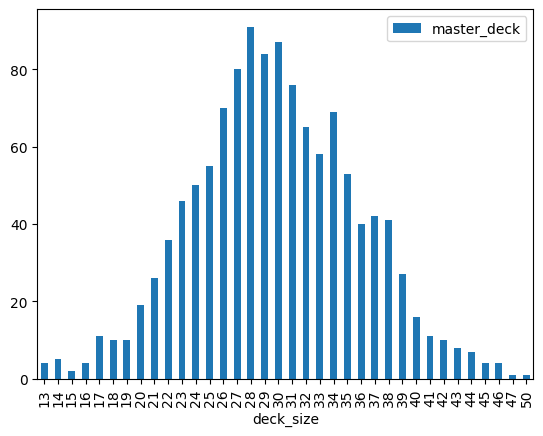

In [180]:
winning_decks.groupby = winning_decks.groupby(['deck_size']).count()
winning_decks.groupby.plot(kind = 'bar')

In [173]:
def winning_deck_size_graph(df): 
    heart_kills_mask = df['floor_reached'] == 57
    heart_kills_df = df[heart_kills_mask]
    heart_kills_df['deck_size'] = heart_kills_df['master_deck'].map(lambda x : len(x))
    heart_kills_deck_size = heart_kills_df['deck_size'].value_counts().sort_index()
    heart_kills_deck_size.plot(kind = "bar")

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_69670/2015532211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_kills_df['deck_size'] = heart_kills_df['master_deck'].map(lambda x : len(x))


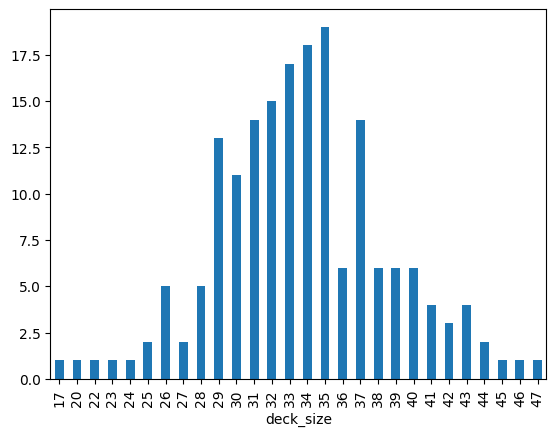

In [174]:
winning_deck_size_graph(ironclad_df)

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_69670/2015532211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_kills_df['deck_size'] = heart_kills_df['master_deck'].map(lambda x : len(x))


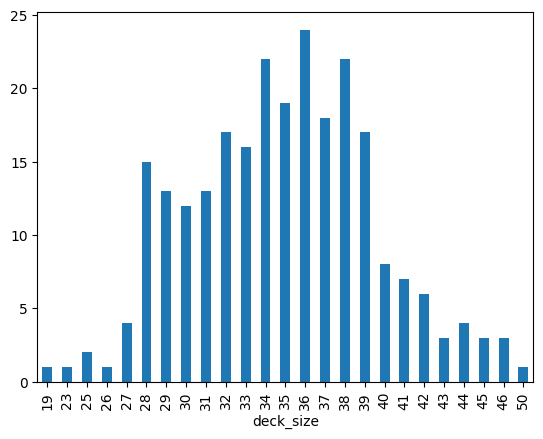

In [175]:
winning_deck_size_graph(silent_df)

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_69670/2015532211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_kills_df['deck_size'] = heart_kills_df['master_deck'].map(lambda x : len(x))


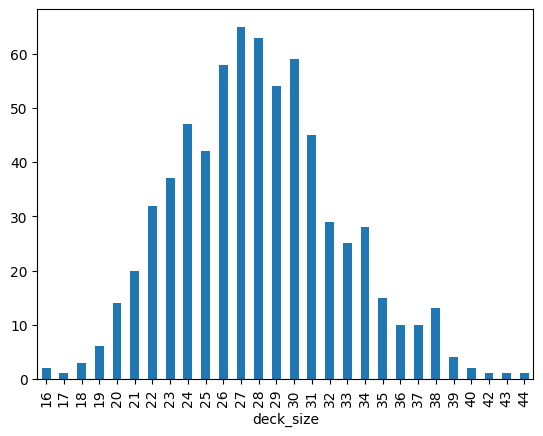

In [176]:
winning_deck_size_graph(defect_df)

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_69670/2015532211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_kills_df['deck_size'] = heart_kills_df['master_deck'].map(lambda x : len(x))


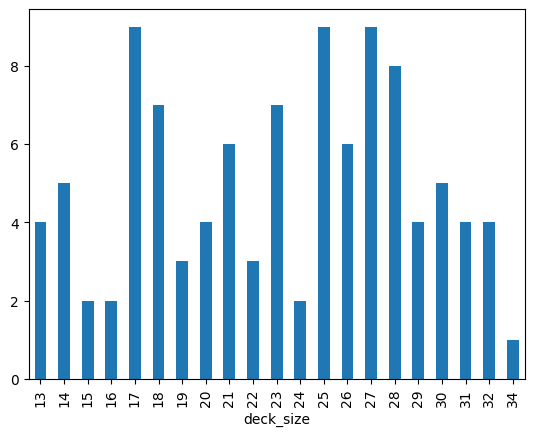

In [177]:
winning_deck_size_graph(watcher_df)

In [183]:
def get_pick_rate_dicts(df):
    picked = {}
    not_picked = {}
    for index, row in df.iterrows():
        for dict in row['card_choices']:
            for card in dict['not_picked']:
                not_picked[card] = not_picked.get(card, 0) + 1
            picked_card = dict['picked']
            picked[picked_card] = picked.get(picked_card, 0) + 1
    return picked, not_picked

def card_pick_rate(df):
    heart_kills_mask = df['floor_reached'] == 57
    losing_runs_mask = df['floor_reached'] != 57
    losing_runs_df = df[losing_runs_mask]
    heart_kills_df = df[heart_kills_mask]
    winning_picked = {}
    winning_not_picked = {}
    losing_picked = {}
    losing_not_picked = {}
    winning_picked, winning_not_picked = get_pick_rate_dicts(heart_kills_df)
    losing_picked, losing_not_picked = get_pick_rate_dicts(losing_runs_df)
    dict_list = {"Skip_Frequency_in_Wins" : winning_not_picked, "Pick_Frequency_in_Wins" : winning_picked, 
                 "Skip_Frequency_in_Losses" : losing_not_picked, "Pick_Frequency_in_Losses" : losing_picked}
    final_picked_df = pd.DataFrame.from_dict(dict_list, orient = 'index')
    final_picked_df = final_picked_df.fillna(0)
    final_picked_df = final_picked_df.transpose()
    final_picked_df["Seen_in_Wins"] = final_picked_df["Skip_Frequency_in_Wins"] + final_picked_df["Pick_Frequency_in_Wins"]
    final_picked_df["Seen_in_loses"] = final_picked_df["Skip_Frequency_in_Losses"] + final_picked_df["Pick_Frequency_in_Losses"]
    final_picked_df["Seen"] = final_picked_df['Seen_in_loses'] + final_picked_df['Seen_in_Wins']
    final_picked_df["Pick_Rate"] = (final_picked_df['Pick_Frequency_in_Losses'] + final_picked_df['Pick_Frequency_in_Wins']) / final_picked_df['Seen']
    final_picked_df["Pick_Rate_In_Wins"] = np.where(final_picked_df["Seen_in_Wins"] == 0, 0, 
                                                    final_picked_df['Pick_Frequency_in_Wins']/final_picked_df['Seen_in_Wins'])
    final_picked_df["Pick_Rate_in_Losses"] = np.where(final_picked_df["Seen_in_loses"] == 0, 0, 
                                                      final_picked_df['Pick_Frequency_in_Losses']/final_picked_df["Seen_in_loses"])
    final_picked_df["Win_Rate_Estimate"] = final_picked_df['Pick_Frequency_in_Wins'] / final_picked_df["Seen"]
    print(final_picked_df)


In [184]:
card_pick_rate(ironclad_df)

                    Skip_Frequency_in_Wins  Pick_Frequency_in_Wins  \
HandOfGreed                            6.0                     1.0   
Transmutation                          4.0                     0.0   
Pummel                               113.0                     8.0   
Armaments                            327.0                    39.0   
Clash                                355.0                     0.0   
...                                    ...                     ...   
Underhanded Strike                     0.0                     0.0   
Machine Learning                       0.0                     0.0   
DeusExMachina                          0.0                     0.0   
Hyperbeam                              0.0                     0.0   
Blade Dance                            0.0                     0.0   

                    Skip_Frequency_in_Losses  Pick_Frequency_in_Losses  \
HandOfGreed                              5.0                       6.0   
Transmutati

In [185]:
card_pick_rate(silent_df)

                      Skip_Frequency_in_Wins  Pick_Frequency_in_Wins  \
Backstab                               172.0                    30.0   
Bane                                   471.0                     5.0   
PiercingWail                           239.0                   237.0   
Sucker Punch                           485.0                     7.0   
Prepared                               409.0                    35.0   
...                                      ...                     ...   
Deep Breath+1                            0.0                     3.0   
Master of Strategy+1                     0.0                     4.0   
Panacea+1                                0.0                     2.0   
Secret Technique+1                       0.0                     1.0   
Flash of Steel+1                         0.0                     0.0   

                      Skip_Frequency_in_Losses  Pick_Frequency_in_Losses  \
Backstab                                 295.0             

In [186]:
card_pick_rate(defect_df)

                      Skip_Frequency_in_Wins  Pick_Frequency_in_Wins  \
Beam Cell                             1338.0                    71.0   
Redo                                  1371.0                    27.0   
Skim                                   453.0                    42.0   
White Noise                            409.0                    28.0   
Barrage                               1479.0                    24.0   
...                                      ...                     ...   
After Image                              0.0                     1.0   
Master of Strategy+1                     0.0                     1.0   
Shrug It Off                             0.0                     0.0   
Dagger Spray                             0.0                     0.0   
All Out Attack                           0.0                     0.0   

                      Skip_Frequency_in_Losses  Pick_Frequency_in_Losses  \
Beam Cell                               2261.0             

In [187]:
card_pick_rate(watcher_df)

                      Skip_Frequency_in_Wins  Pick_Frequency_in_Wins  \
Crescendo                              190.0                    14.0   
Protect                                196.0                    15.0   
Evaluate                               196.0                     1.0   
FollowUp                               213.0                     2.0   
ReachHeaven                             86.0                     0.0   
...                                      ...                     ...   
The Bomb                                 0.0                     0.0   
Forethought+1                            0.0                     0.0   
Master of Strategy+1                     0.0                     0.0   
Good Instincts+1                         0.0                     0.0   
Panacea+1                                0.0                     0.0   

                      Skip_Frequency_in_Losses  Pick_Frequency_in_Losses  \
Crescendo                                149.0             

In [188]:
def make_histogram_look_better(hist, title, x_label):
    hist =  hist[0]
    for x in hist : 
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        x.tick_params(bottom=False, top=False, left=False, right=False)

        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        x.set_title(title)
        x.set_xlabel(x_label)
    return hist

def get_playtime(df, char_name):
    playtime_df = df[['playtime', 'floor_reached', 'character_chosen']].copy()
    heart_kills_mask = playtime_df['floor_reached'] == 57
    playtime_df['playtime'] = playtime_df['playtime'].div(60).round(2)
    losing_runs_mask = playtime_df['floor_reached'] != 57
    winning_runs = playtime_df[heart_kills_mask]
    losing_runs = playtime_df[losing_runs_mask]
    win_hist = winning_runs.hist(column='playtime', bins = 10, grid = False, zorder=2, rwidth=0.9)
    make_histogram_look_better(win_hist, char_name.capitalize() + " winning run playtime",
                               "Minutes Played (Minutes)")
    win_hist
    lose_hist = losing_runs.hist(column='playtime', bins = 10, grid = False, zorder=2, rwidth=0.9)
    make_histogram_look_better(lose_hist, char_name.capitalize() + " losing run playtime",
                               "Minutes Played (Minutes)")
    floor_reached_bins = [0, 17, 34, 52, 57]
    floor_hist = losing_runs.hist(column='floor_reached', bins = floor_reached_bins, grid = False, zorder=2, rwidth=0.9)
    make_histogram_look_better(floor_hist, char_name.capitalize() + " floor reached on loss", 
                               "Floor Reached")

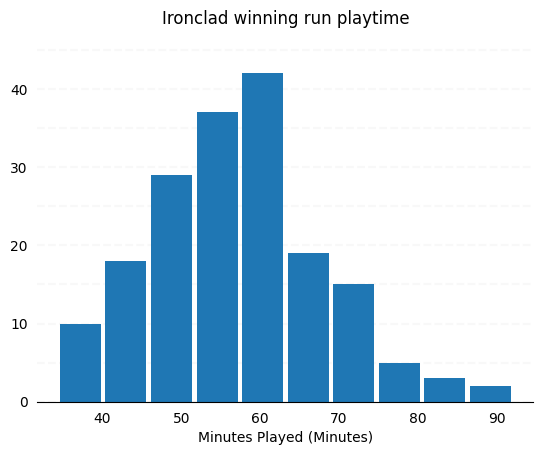

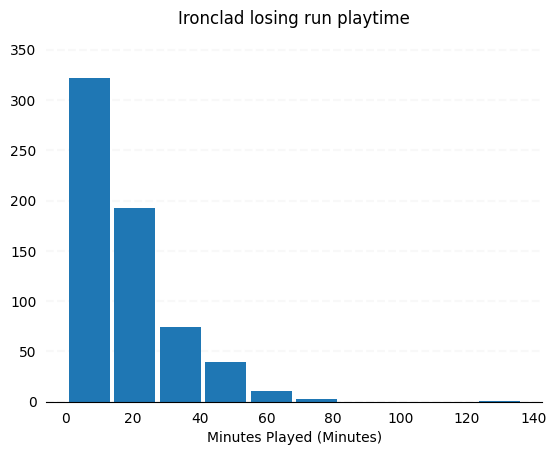

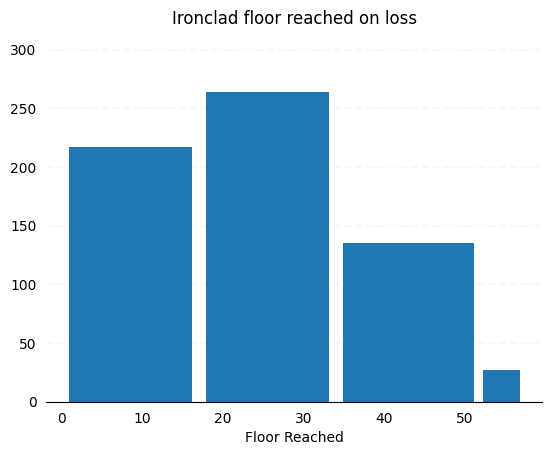

In [189]:
get_playtime(ironclad_df, "IRONCLAD")

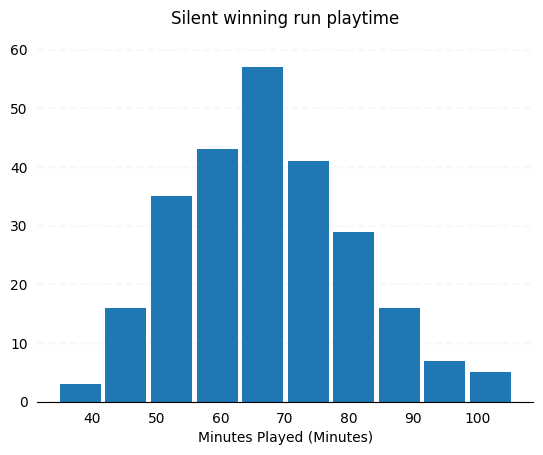

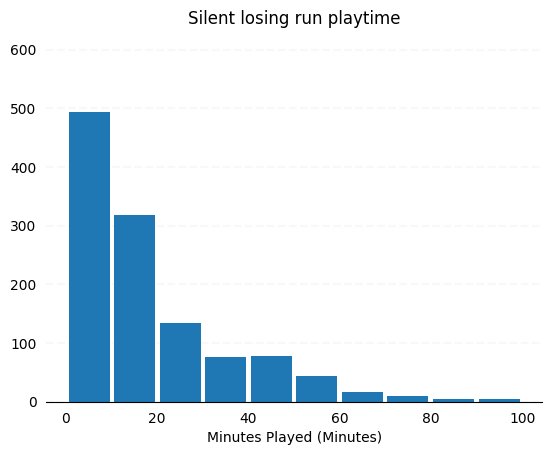

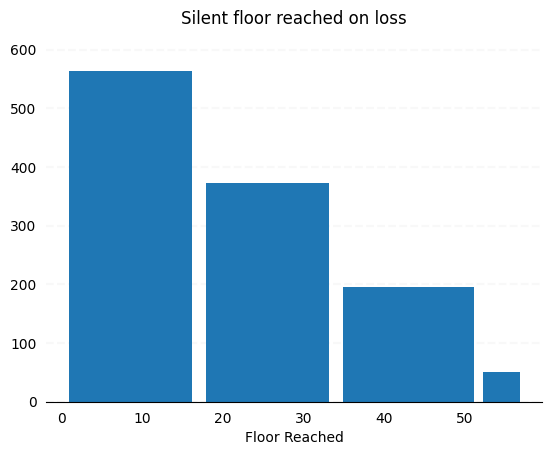

In [190]:
get_playtime(silent_df, "SILENT")

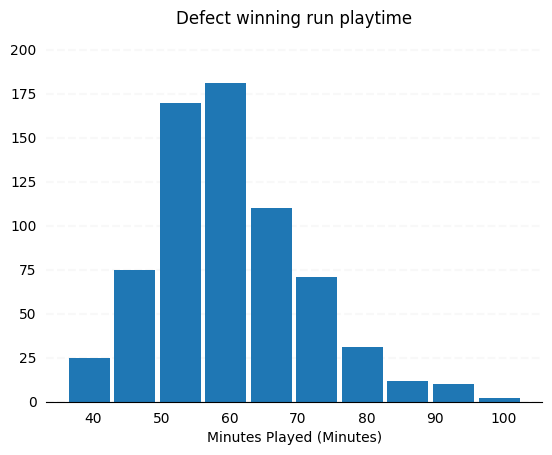

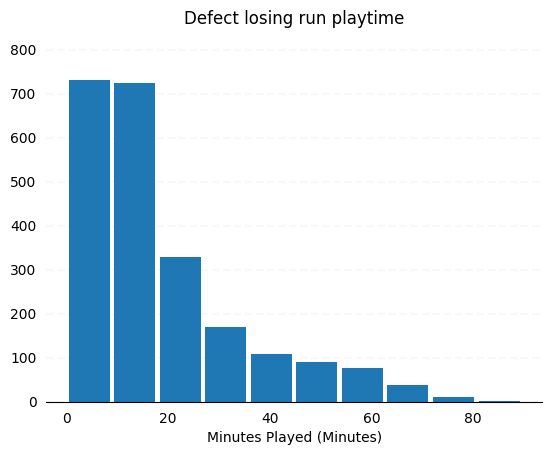

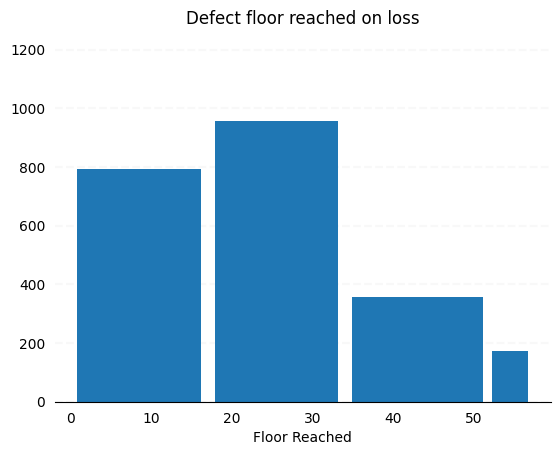

In [191]:
get_playtime(defect_df, "DEFECT")

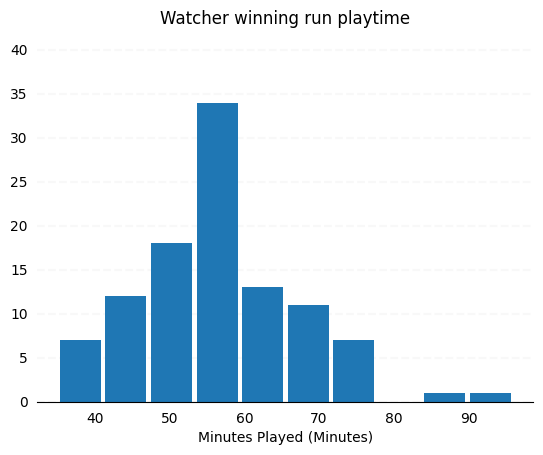

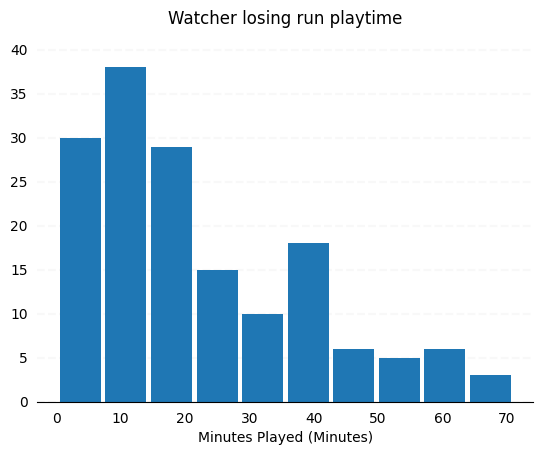

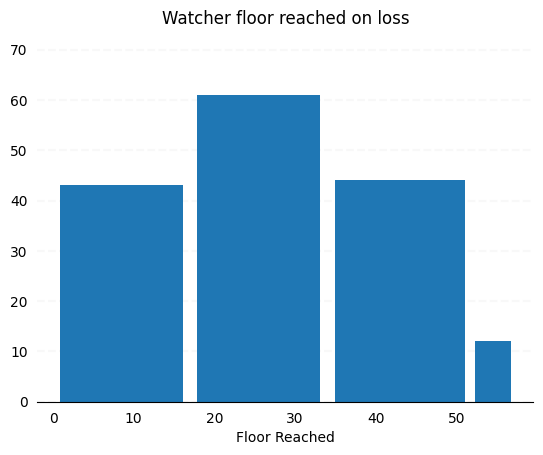

In [192]:
get_playtime(watcher_df, "WATCHER")

In [221]:
damage_taken_df = df[['damage_taken', 'floor_reached', 'character_chosen']].copy()

def get_damage_taken_df(df): 
    damage_taken_dict = {}
    damage_taken_count = {}
    damage_taken_freq = {}
    for index, row in df.iterrows():
        for dict in row['damage_taken']:
            damage_taken_dict[dict['enemies']] = damage_taken_dict.get(dict['enemies'], 0) + dict['damage']
            damage_taken_count[dict['enemies']] = damage_taken_count.get(dict['enemies'], 0) + 1
            damage_taken_freq[dict['enemies']] = damage_taken_freq.get(dict['enemies'], {})
            damage_taken_freq[dict['enemies']][dict['damage']] = damage_taken_freq[dict['enemies']].get(dict['damage'], 0) + 1
    total_damage_taken_df = pd.DataFrame.from_dict(damage_taken_dict, orient = 'index', columns=['Total Damage Taken'])
    total_encounters_df = pd.DataFrame.from_dict(damage_taken_count, orient = 'index', columns =['Times Encountered'])
    merge_df = pd.merge(total_damage_taken_df, total_encounters_df, left_index = True, right_index = True)
    merge_df['Average Damage Taken'] = merge_df['Total Damage Taken'] / merge_df['Times Encountered']
    merge_df = merge_df.sort_values(by=['Average Damage Taken'], ascending = False)
    return merge_df, damage_taken_freq

def get_damage_taken_dict(some_char):
    if some_char == 'IRONCLAD': 
        char_runs = damage_taken_df['character_chosen'] == 'IRONCLAD'
    elif some_char == 'THE_SILENT': 
        char_runs = damage_taken_df['character_chosen'] == 'THE_SILENT'
    elif some_char == 'DEFECT': 
        char_runs = damage_taken_df['character_chosen'] == 'DEFECT'
    else: 
        char_runs = damage_taken_df['character_chosen'] == 'WATCHER' 
    char_damage_taken_df = damage_taken_df[char_runs]
    win_and_loss_df, win_and_loss_freq = get_damage_taken_df(char_damage_taken_df)
    heart_kills = damage_taken_df['floor_reached'] == 57
    heart_kills_by_char = char_runs & heart_kills
    win_df, win_freq = get_damage_taken_df(damage_taken_df[heart_kills_by_char])
    return win_and_loss_df, win_df, win_and_loss_freq, win_freq

ironclad_total_damage, ironclad_damage_win, ironclad_win_and_loss_damage_freq, ironclad_win_damage_freq = get_damage_taken_dict("IRONCLAD")
ironclad_total_damage

,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,15392.0,201,76.577114
Awakened One,9172.0,162,56.617284
Shield and Spear,11071.0,207,53.483092
Collector,7725.0,150,51.500000
Automaton,5782.0,122,47.393443
...,...,...,...
Looter,1698.0,268,6.335821
Small Slimes,3208.0,575,5.579130
2 Fungi Beasts,1200.0,247,4.858300
2 Louse,2197.0,571,3.847636


In [224]:
def get_damage_taken_df(df): 
    damage_taken_dict = {}
    damage_taken_count = {}
    damage_taken_freq = {}
    for row in df.itertuples():
        for dict in row.damage_taken:
            damage_taken_dict[dict['enemies']] = damage_taken_dict.get(dict['enemies'], 0) + dict['damage']
            damage_taken_count[dict['enemies']] = damage_taken_count.get(dict['enemies'], 0) + 1
            damage_taken_freq[dict['enemies']] = damage_taken_freq.get(dict['enemies'], {})
            damage_taken_freq[dict['enemies']][dict['damage']] = damage_taken_freq[dict['enemies']].get(dict['damage'], 0) + 1
    total_damage_taken_df = pd.DataFrame.from_dict(damage_taken_dict, orient = 'index', columns=['Total Damage Taken'])
    total_encounters_df = pd.DataFrame.from_dict(damage_taken_count, orient = 'index', columns =['Times Encountered'])
    merge_df = pd.merge(total_damage_taken_df, total_encounters_df, left_index = True, right_index = True)
    merge_df['Average Damage Taken'] = merge_df['Total Damage Taken'] / merge_df['Times Encountered']
    merge_df = merge_df.sort_values(by=['Average Damage Taken'], ascending = False)
    return merge_df, damage_taken_freq

def get_damage_taken_dict(df):
    char_damage_taken_df = df[['damage_taken', 'floor_reached', 'character_chosen']].copy()
    win_and_loss_df, win_and_loss_freq = get_damage_taken_df(char_damage_taken_df)
    heart_kills_mask= damage_taken_df['floor_reached'] == 57
    win_df, win_freq = get_damage_taken_df(char_damage_taken_df[heart_kills_mask])
    return win_and_loss_df, win_df, win_and_loss_freq, win_freq


In [225]:
ironclad_total_damage, ironclad_damage_win, ironclad_win_and_loss_damage_freq, ironclad_win_damage_freq = get_damage_taken_dict(ironclad_df)
ironclad_total_damage

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_69670/2515375270.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  win_df, win_freq = get_damage_taken_df(char_damage_taken_df[heart_kills_mask])


,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,15392.0,201,76.577114
Awakened One,9172.0,162,56.617284
Shield and Spear,11071.0,207,53.483092
Collector,7725.0,150,51.500000
Automaton,5782.0,122,47.393443
...,...,...,...
Looter,1698.0,268,6.335821
Small Slimes,3208.0,575,5.579130
2 Fungi Beasts,1200.0,247,4.858300
2 Louse,2197.0,571,3.847636


In [226]:
ironclad_damage_win

,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,13437.0,180,74.650000
Awakened One,5913.0,111,53.270270
Shield and Spear,9263.0,180,51.461111
Automaton,2541.0,55,46.200000
Time Eater,5818.0,130,44.753846
...,...,...,...
Looter,354.0,69,5.130435
Small Slimes,657.0,130,5.053846
2 Fungi Beasts,247.0,57,4.333333
2 Louse,497.0,142,3.500000


In [227]:
ironclad_win_and_loss_damage_freq

{'2 Louse': {4: 31,
  3.0: 53,
  2: 55,
  6.0: 32,
  0.0: 176,
  5: 38,
  1.0: 41,
  12.0: 15,
  8: 22,
  10.0: 18,
  11: 11,
  13.0: 4,
  14.0: 5,
  9.0: 39,
  7.0: 27,
  15.0: 2,
  16: 2},
 'Small Slimes': {7: 67,
  8.0: 24,
  0.0: 141,
  3.0: 24,
  10: 35,
  14: 11,
  12.0: 23,
  1: 29,
  4.0: 63,
  5.0: 36,
  2.0: 22,
  6: 18,
  15.0: 12,
  9.0: 28,
  19.0: 3,
  16: 9,
  11.0: 12,
  18: 4,
  13: 6,
  30.0: 1,
  20: 2,
  23.0: 2,
  17.0: 3},
 'Jaw Worm': {7: 105,
  4.0: 60,
  0.0: 88,
  9.0: 95,
  3.0: 6,
  11.0: 22,
  10.0: 4,
  23.0: 4,
  6.0: 24,
  14.0: 30,
  19.0: 8,
  2.0: 57,
  5.0: 11,
  8: 10,
  12.0: 20,
  17.0: 6,
  16: 15,
  13.0: 8,
  24: 4,
  21.0: 2,
  20.0: 1,
  1.0: 2,
  18.0: 3},
 'Lagavulin': {28: 16,
  18.0: 18,
  8: 11,
  6: 7,
  30.0: 34,
  10.0: 15,
  13: 15,
  0.0: 57,
  17: 23,
  51.0: 2,
  23.0: 12,
  3.0: 8,
  15.0: 27,
  36.0: 6,
  33.0: 3,
  32: 4,
  27: 15,
  50: 4,
  9: 6,
  5.0: 9,
  35.0: 13,
  12.0: 11,
  34.0: 9,
  16.0: 9,
  14.0: 9,
  39.0: 4,
  

In [228]:
ironclad_win_damage_freq

{'Small Slimes': {7.0: 12,
  0.0: 33,
  5.0: 12,
  2.0: 5,
  10.0: 7,
  1: 9,
  15.0: 2,
  19.0: 1,
  4.0: 18,
  12.0: 7,
  9.0: 6,
  11.0: 3,
  16.0: 2,
  13.0: 2,
  8.0: 4,
  6.0: 2,
  3.0: 4,
  18.0: 1},
 'Cultist': {0.0: 39,
  3.0: 5,
  1.0: 41,
  2.0: 7,
  7: 9,
  6.0: 23,
  12.0: 6,
  4.0: 7,
  11: 1,
  13.0: 1,
  23.0: 1},
 'Jaw Worm': {3.0: 3,
  4.0: 20,
  9.0: 12,
  2.0: 14,
  7.0: 20,
  11.0: 3,
  19.0: 3,
  8: 3,
  0.0: 23,
  14.0: 3,
  6.0: 5,
  13.0: 2,
  12.0: 4,
  5.0: 3,
  24.0: 1,
  16.0: 6,
  21.0: 2},
 'Gremlin Nob': {24.0: 7,
  8.0: 27,
  32.0: 11,
  6.0: 19,
  10.0: 11,
  39.0: 1,
  42.0: 1,
  0.0: 22,
  28.0: 2,
  12: 2,
  47.0: 1,
  17: 1,
  3.0: 4,
  20.0: 1,
  22.0: 2,
  29.0: 5,
  2: 5,
  11.0: 3,
  7.0: 1,
  25.0: 4,
  21.0: 3,
  23.0: 1,
  27.0: 2,
  18: 1,
  5.0: 4,
  31.0: 1,
  4.0: 2,
  55.0: 1,
  33.0: 1,
  34.0: 2,
  45.0: 1,
  19.0: 1,
  56.0: 1,
  9.0: 2,
  13.0: 2,
  15.0: 2,
  14.0: 1,
  1.0: 1,
  38.0: 1},
 'Exordium Thugs': {31.0: 1,
  22.0: 1,
  

In [229]:
for key in sorted(ironclad_win_damage_freq['Shield and Spear']):
    print(key, ironclad_win_damage_freq['Shield and Spear'][key])

0 12
1.0 2
2 2
3 1
4 1
5 1
6.0 4
8.0 2
9 4
10 4
12 3
13 1
15 2
16 2
18 3
19 1
20.0 4
21 4
22.0 1
23 3
24.0 2
25 5
27.0 1
28 3
29 1
30 2
31.0 1
32 3
33.0 1
34 1
35 2
36 3
37 2
38 3
39.0 1
40 3
41 3
42 1
43 1
44 1
45 1
46 1
47 2
48 2
54 1
55.0 2
56 2
58.0 1
59 1
61 1
62 2
63 3
64 2
65 1
66.0 2
67 3
69 1
71 1
72 3
74 2
75 3
76 1
79 1
80 2
81.0 2
82.0 3
83 4
84 1
87 2
88 1
89.0 1
91 2
93.0 1
99 1
100.0 2
103 1
104.0 1
106 1
107.0 1
110 1
111.0 1
114 1
117 2
119 1
123.0 1
124 1
131 1
137 1
151 1
152 1
154.0 1
160 1
164 2
193.0 1
218 1


In [230]:
silent_total_damge, silent_damage_win, silent_win_and_loss_damage_freq, silent_win_damage_freq = get_damage_taken_dict(silent_df)
silent_total_damge

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_69670/2515375270.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  win_df, win_freq = get_damage_taken_df(char_damage_taken_df[heart_kills_mask])


,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,9268.0,294,31.523810
Time Eater,4551.0,247,18.425101
Collector,3248.0,182,17.846154
Lagavulin Event,88.0,5,17.600000
Slime Boss,6411.0,367,17.468665
...,...,...,...
2 Fungi Beasts,622.0,405,1.535802
Orb Walker,494.0,325,1.520000
3 Shapes,452.0,312,1.448718
2 Louse,857.0,1081,0.792784


In [231]:
silent_damage_win

,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,7625.0,252,30.257937
Slime Boss,1209.0,76,15.907895
Time Eater,2025.0,152,13.322368
Hexaghost,1142.0,86,13.279070
Collector,1057.0,81,13.049383
...,...,...,...
Sphere and 2 Shapes,136.0,119,1.142857
Orb Walker,167.0,166,1.006024
2 Louse,184.0,203,0.906404
3 Shapes,131.0,154,0.850649


In [232]:
silent_total_damge.loc['Shield and Spear']

Total Damage Taken      3931.000000
Times Encountered        302.000000
Average Damage Taken      13.016556
Name: Shield and Spear, dtype: float64

In [233]:
silent_win_and_loss_damage_freq

{'Small Slimes': {0.0: 544,
  2: 52,
  13: 3,
  4.0: 110,
  5: 34,
  1: 110,
  6.0: 25,
  15.0: 3,
  7.0: 57,
  8.0: 14,
  3.0: 40,
  17.0: 2,
  14.0: 2,
  9.0: 19,
  11: 5,
  10.0: 9,
  12.0: 9,
  18: 1},
 'Lagavulin': {0.0: 148,
  10.0: 36,
  24.0: 14,
  20: 18,
  4.0: 24,
  17: 24,
  37.0: 4,
  16.0: 24,
  14: 24,
  2.0: 21,
  15.0: 32,
  6: 22,
  12.0: 39,
  18: 24,
  19: 9,
  34: 5,
  22: 21,
  21.0: 14,
  5: 26,
  11.0: 12,
  31.0: 7,
  9.0: 17,
  1: 12,
  25: 21,
  32.0: 4,
  23.0: 9,
  3.0: 14,
  7.0: 38,
  13: 11,
  35.0: 7,
  40.0: 6,
  39: 4,
  29: 11,
  36: 4,
  28: 5,
  33: 9,
  8: 12,
  44.0: 2,
  47.0: 2,
  45.0: 1,
  41: 2,
  27: 7,
  26: 4,
  38: 4,
  30.0: 5,
  61: 1,
  48.0: 2,
  50.0: 1,
  43: 1,
  59.0: 1},
 '2 Louse': {0.0: 763,
  6: 15,
  3: 50,
  5.0: 14,
  12.0: 1,
  1: 119,
  9.0: 3,
  4.0: 38,
  2: 64,
  7: 9,
  10: 3,
  8.0: 2},
 'Cultist': {0.0: 578,
  3: 63,
  13.0: 5,
  1: 162,
  7: 23,
  6.0: 47,
  8.0: 14,
  4.0: 41,
  2: 38,
  5.0: 12,
  9.0: 12,
  11.

In [234]:
silent_win_damage_freq

{'Jaw Worm': {4: 17,
  0.0: 97,
  11.0: 5,
  2.0: 15,
  9.0: 3,
  1.0: 14,
  7.0: 6,
  6.0: 5,
  14.0: 1,
  13.0: 2,
  25.0: 1,
  3.0: 4,
  16.0: 1,
  15.0: 2,
  5.0: 4,
  10.0: 3,
  12: 3,
  8.0: 4},
 '2 Louse': {6: 6,
  0.0: 137,
  12.0: 1,
  4.0: 7,
  5.0: 3,
  2.0: 12,
  1: 26,
  3.0: 9,
  7.0: 1,
  9.0: 1},
 'Small Slimes': {0: 93,
  15.0: 2,
  7.0: 14,
  8.0: 4,
  4.0: 17,
  3.0: 8,
  2.0: 7,
  1.0: 21,
  10.0: 2,
  9.0: 3,
  12.0: 3,
  6.0: 3,
  5.0: 8,
  14.0: 1,
  11.0: 1},
 'Gremlin Nob': {34: 4,
  0: 53,
  21.0: 4,
  1.0: 5,
  14.0: 3,
  8.0: 23,
  35.0: 2,
  25.0: 4,
  7.0: 6,
  12.0: 3,
  11.0: 5,
  9.0: 5,
  6.0: 14,
  19.0: 3,
  33.0: 1,
  28.0: 1,
  10.0: 3,
  24.0: 5,
  32.0: 2,
  37.0: 2,
  29.0: 2,
  2.0: 3,
  13.0: 3,
  3.0: 5,
  22.0: 4,
  23.0: 3,
  18.0: 1,
  64.0: 1,
  26.0: 3,
  42.0: 1,
  4.0: 5,
  40.0: 1,
  20.0: 1,
  31.0: 3,
  5.0: 2,
  39.0: 1,
  36.0: 1},
 'Blue Slaver': {0: 43,
  2.0: 4,
  7: 1,
  1.0: 6,
  3.0: 8,
  4.0: 8,
  6.0: 3,
  9.0: 2,
  17.0: 

In [235]:
for key in sorted(silent_win_damage_freq['The Heart']):
    print(key, silent_win_damage_freq['The Heart'][key])

0 39
1 5
3 4
4 2
5 3
6 6
7 1
8 3
9 4
10 8
11 2
12 6
13 4
14 3
15 4
16 5
17 4
18 2
19 3
20 2
21 1
22 2
23 1
24 3
26 5
27 4
28 2
29 5
30 6
31 5
32 3
33 2
34 3
35 5
36 6
37 2
38 1
39 4
40 3
41 1
42 3
43 6
44 2
45 3
46 4
47 3
48 2
49 2
50 2
52 5
53 1
54 4
55 2
56 1
59 2
60 1
61 2
62 4
63 1
64 2
65 1
67 2
69 1
70 1
71 1
73 2
74 2
76 1
82 2
83 1
85 2
92 1
93 1
95 1
96 1
97 2
103 2
111 1
112 1


In [236]:
defect_total_damage, defect_damage_win, defect_win_and_loss_damage_freq, defect_win_damage_freq = get_damage_taken_dict(defect_df)
defect_total_damage

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_69670/2515375270.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  win_df, win_freq = get_damage_taken_df(char_damage_taken_df[heart_kills_mask])


,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,30613.0,815,37.561963
Shield and Spear,23493.0,859,27.349243
Awakened One,13562.0,634,21.391167
Lagavulin Event,449.0,21,21.380952
Collector,9175.0,449,20.434298
...,...,...,...
Mind Bloom Boss Battle,737.0,228,3.232456
Sphere and 2 Shapes,1612.0,509,3.166994
2 Fungi Beasts,2554.0,945,2.702646
2 Louse,4886.0,2179,2.242313


In [237]:
defect_damage_win

,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,24055.0,687,35.014556
Shield and Spear,15530.0,687,22.605531
Awakened One,8084.0,438,18.456621
Lagavulin Event,173.0,10,17.300000
Hexaghost,3548.0,206,17.223301
...,...,...,...
Mind Bloom Boss Battle,388.0,141,2.751773
Sphere and 2 Shapes,837.0,315,2.657143
2 Fungi Beasts,677.0,257,2.634241
2 Louse,1140.0,518,2.200772


In [238]:
defect_win_and_loss_damage_freq

{'Cultist': {1: 596,
  0.0: 1252,
  2.0: 78,
  7.0: 37,
  4.0: 33,
  3: 24,
  6: 111,
  10: 2,
  12.0: 7,
  5: 6,
  9: 3,
  11.0: 4,
  8.0: 3,
  16: 1,
  18: 1,
  19: 1},
 'Small Slimes': {3: 132,
  4: 201,
  0.0: 840,
  10: 82,
  6: 56,
  15: 30,
  13.0: 19,
  5.0: 133,
  7.0: 213,
  1: 130,
  12: 53,
  8: 67,
  30: 1,
  14: 23,
  9.0: 66,
  2.0: 97,
  11: 49,
  16: 10,
  18.0: 9,
  22.0: 2,
  19.0: 1,
  21: 2,
  20.0: 1,
  17.0: 3,
  24: 1},
 'Jaw Worm': {2: 497,
  5: 69,
  0.0: 517,
  1: 20,
  4.0: 210,
  7: 458,
  12: 89,
  10.0: 23,
  3: 19,
  9.0: 97,
  6: 17,
  8.0: 18,
  14: 27,
  11: 14,
  13.0: 2,
  19.0: 6,
  17.0: 1,
  21.0: 2,
  23.0: 1,
  16: 4},
 'Lots of Slimes': {15: 9,
  5.0: 22,
  0: 120,
  20: 6,
  18: 9,
  19: 9,
  13.0: 17,
  26.0: 1,
  7.0: 30,
  12.0: 22,
  21.0: 4,
  16: 13,
  6.0: 28,
  3: 11,
  9.0: 19,
  4: 21,
  8.0: 24,
  2.0: 16,
  10: 17,
  1.0: 17,
  30.0: 3,
  11.0: 15,
  14: 9,
  23: 5,
  22: 7,
  17.0: 12,
  27.0: 1,
  34: 1,
  24: 2,
  25.0: 4,
  28

In [239]:
defect_win_damage_freq

{'Small Slimes': {0.0: 196,
  13.0: 3,
  9.0: 17,
  2.0: 29,
  14: 7,
  5.0: 30,
  3.0: 34,
  6.0: 10,
  7.0: 54,
  1.0: 31,
  4.0: 55,
  12: 16,
  8.0: 15,
  18.0: 1,
  11.0: 5,
  19.0: 1,
  10.0: 14,
  15.0: 5,
  20.0: 1,
  17.0: 1},
 '2 Louse': {8.0: 15,
  0.0: 264,
  2.0: 44,
  3.0: 51,
  1.0: 46,
  7.0: 16,
  5.0: 14,
  6.0: 13,
  4.0: 17,
  10.0: 15,
  9.0: 12,
  15: 4,
  14.0: 2,
  12.0: 2,
  11.0: 2,
  13.0: 1},
 'Cultist': {0.0: 309,
  1.0: 137,
  4.0: 7,
  7.0: 8,
  6: 23,
  2.0: 13,
  5.0: 1,
  9: 2,
  11.0: 1,
  3.0: 2},
 'Blue Slaver': {3.0: 34,
  0.0: 74,
  2.0: 15,
  12.0: 4,
  7.0: 11,
  11.0: 16,
  9.0: 9,
  4.0: 20,
  8.0: 23,
  5.0: 10,
  1.0: 14,
  13.0: 5,
  6.0: 13,
  14.0: 3,
  10: 3,
  15.0: 1,
  17.0: 1,
  16.0: 1,
  19.0: 1},
 'Exordium Wildlife': {4.0: 10,
  17.0: 3,
  0.0: 59,
  7.0: 12,
  9.0: 5,
  8: 5,
  15: 5,
  2.0: 8,
  5.0: 14,
  19.0: 3,
  12.0: 11,
  1.0: 16,
  10.0: 8,
  13.0: 6,
  6.0: 8,
  21.0: 1,
  16.0: 2,
  25.0: 1,
  3.0: 4,
  11.0: 4,
  18.

In [240]:
for key in sorted(defect_win_damage_freq['The Heart']):
    print(key, defect_win_damage_freq['The Heart'][key])

0 37
1 6
2 9
3 5
4 11
5 6
6 5
7 10
8 14
9 3
10 11
11 7
12 13
13 1
14 15
15 6
16 16
17 15
18 13
19 9
20 9
21 13
22 8
23 15
24 13
25 12
26 9
27 9
28 7
29 8
30 13
31 9
32 9
33 15
34 9
35 7
36 7
37 12
38 10
39 14
40 4
41 8
42 7
43 14
44 10
45 6
46 6
47 8
48 9
49 9
50 8
51 8
52 7
53 10
54 6
55 9
56 5
57 5
58 7
59 8
60 7
61 8
62 4
63 10
64 8
65 2
66 7
67 3
68 2
69 3
70 1
72 1
73 6
74 6
75 2
76 2
77 3
78 4
79 7
80 1
82 2
83 2
84 2
86 2
88 2
92 2
93 1
95 1
96 1
98 1
103 2
104 2
106 1
108 1
109 1
110 1
116 1
121 1


In [241]:
watcher_total_damage, watcher_damage_win, watcher_win_and_loss_damage_freq, watcher_win_damage_freq = get_damage_taken_dict(watcher_df)
watcher_total_damage

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_69670/2515375270.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  win_df, win_freq = get_damage_taken_df(char_damage_taken_df[heart_kills_mask])


,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,3396.0,113,30.053097
The Guardian,1427.0,71,20.098592
Time Eater,1634.0,83,19.686747
Automaton,1005.0,54,18.611111
Hexaghost,1378.0,79,17.443038
...,...,...,...
Sphere and 2 Shapes,134.0,72,1.861111
Mind Bloom Boss Battle,46.0,25,1.840000
Transient,138.0,82,1.682927
2 Fungi Beasts,153.0,93,1.645161


In [242]:
watcher_damage_win

,Total Damage Taken,Times Encountered,Average Damage Taken
The Heart,3008.0,104,28.923077
The Guardian,566.0,32,17.687500
Hexaghost,575.0,35,16.428571
Automaton,400.0,25,16.000000
Collector,578.0,40,14.450000
...,...,...,...
Spheric Guardian,49.0,47,1.042553
Large Slime,33.0,32,1.031250
Sphere and 2 Shapes,35.0,49,0.714286
Masked Bandits,7.0,12,0.583333


In [243]:
watcher_win_and_loss_damage_freq

{'Jaw Worm': {0.0: 89,
  7: 27,
  4.0: 21,
  2.0: 32,
  12.0: 9,
  9.0: 3,
  6.0: 3,
  10.0: 1,
  3.0: 1,
  8: 3,
  14.0: 1,
  11.0: 1,
  13: 1},
 'Cultist': {0.0: 157,
  1: 23,
  7.0: 4,
  6.0: 3,
  4.0: 2,
  10: 1,
  2: 8,
  3.0: 4,
  5: 1},
 'Small Slimes': {5.0: 8,
  0.0: 100,
  10.0: 4,
  1: 17,
  7.0: 16,
  3.0: 7,
  2: 11,
  12.0: 4,
  4.0: 16,
  6: 9,
  11: 3,
  8: 6,
  13.0: 2,
  9: 4},
 'Exordium Thugs': {0.0: 16,
  9.0: 2,
  7.0: 4,
  4.0: 3,
  23: 1,
  10.0: 5,
  14.0: 4,
  8.0: 6,
  13: 2,
  16: 3,
  12.0: 1,
  19: 3,
  11.0: 3,
  39: 1,
  20: 3,
  6.0: 6,
  21: 2,
  5.0: 1,
  17.0: 1,
  1.0: 1,
  30.0: 1,
  3.0: 1,
  15: 1,
  2: 1},
 'Lots of Slimes': {19.0: 1,
  4.0: 2,
  0.0: 12,
  3.0: 3,
  8.0: 2,
  7: 3,
  12: 1,
  11.0: 4,
  9.0: 3,
  14.0: 2,
  15.0: 3,
  2: 3,
  16.0: 1,
  13.0: 1},
 '3 Sentries': {7.0: 13,
  10.0: 13,
  20: 10,
  11: 5,
  22.0: 8,
  12: 13,
  3.0: 5,
  5: 13,
  6.0: 7,
  2.0: 24,
  1.0: 7,
  42: 1,
  15.0: 12,
  40.0: 2,
  13.0: 5,
  0.0: 29,
  3

In [244]:
watcher_win_damage_freq

{'Jaw Worm': {0.0: 43,
  2.0: 11,
  7.0: 12,
  9.0: 2,
  4.0: 11,
  10.0: 1,
  3.0: 1,
  12.0: 1,
  11.0: 1,
  8: 1},
 'Small Slimes': {0.0: 47,
  1.0: 6,
  3.0: 3,
  12.0: 2,
  5.0: 5,
  7.0: 5,
  6.0: 3,
  10.0: 3,
  4.0: 5,
  2.0: 3,
  8.0: 1,
  9.0: 1,
  13.0: 1},
 'Cultist': {0.0: 61, 4.0: 1, 1.0: 12, 3.0: 2},
 'Lagavulin': {0.0: 46,
  16.0: 2,
  14.0: 3,
  10.0: 3,
  18.0: 2,
  19.0: 1,
  15.0: 5,
  6.0: 3,
  5.0: 3,
  12: 4,
  7.0: 7,
  20.0: 2,
  1.0: 1,
  2.0: 1,
  11.0: 3,
  17.0: 1,
  8: 1,
  4.0: 3,
  13.0: 3,
  3.0: 1,
  22.0: 2,
  32.0: 1,
  21: 1,
  23.0: 1},
 'Gremlin Nob': {30.0: 1,
  22.0: 2,
  0.0: 49,
  6.0: 4,
  14.0: 1,
  3.0: 5,
  13.0: 1,
  12.0: 2,
  18.0: 1,
  4: 2,
  8.0: 6,
  10.0: 2,
  16.0: 6,
  1.0: 2,
  5.0: 1,
  7.0: 1,
  2.0: 2,
  52.0: 1,
  11.0: 2,
  20.0: 1},
 '3 Sentries': {10.0: 5,
  22.0: 3,
  1.0: 5,
  7.0: 6,
  20.0: 4,
  2.0: 11,
  12.0: 6,
  15.0: 4,
  13.0: 4,
  9.0: 3,
  28.0: 2,
  26.0: 1,
  0.0: 17,
  5.0: 7,
  17.0: 2,
  27.0: 4,
  11.0:

In [245]:
for key in sorted(watcher_win_damage_freq['The Heart']):
    print(key, watcher_win_damage_freq['The Heart'][key])

0 10
1 1
3 1
5 5
6 3
8 3
10 4
11 2
12 2
14 7
15 3
16 2
18 3
19 1
20 3
22 1
23 3
25 3
26 2
27 2
29 1
30 4
31 2
32 2
33 2
34 3
38 2
39 2
40 1
41 3
43 1
44 1
46 1
47 2
51 1
54 1
55 1
56 1
58 2
59 1
62 1
63 1
68 1
87 1
116 1
118 1
126 2
127 1


In [246]:
df.loc[500]['damage_taken']

[{'damage': 8.0, 'enemies': 'Small Slimes', 'floor': 1.0, 'turns': 4.0},
 {'damage': 2.0, 'enemies': '2 Louse', 'floor': 3.0, 'turns': 4.0},
 {'damage': 4.0, 'enemies': 'Jaw Worm', 'floor': 4.0, 'turns': 4.0},
 {'damage': 32.0, 'enemies': 'Gremlin Gang', 'floor': 5.0, 'turns': 8.0},
 {'damage': 42, 'enemies': 'Gremlin Nob', 'floor': 7, 'turns': 4}]

In [257]:
def get_turns_taken(df):
    char_damage_taken_df = df[['damage_taken', 'floor_reached', 'character_chosen']].copy()
    turns_taken_dict = {}
    for index, row in char_damage_taken_df.iterrows():
        for dict in row['damage_taken']:
            turns_taken_dict[dict['enemies']] = turns_taken_dict.get(dict['enemies'], {})
            turns_taken_dict[dict['enemies']][dict['turns']] = turns_taken_dict[dict['enemies']].get(dict['turns'], 0) + 1
    return turns_taken_dict

In [258]:
get_turns_taken(ironclad_df)

{'2 Louse': {2: 118, 3.0: 223, 1: 78, 4: 134, 5.0: 16, 6: 2},
 'Small Slimes': {3: 166,
  5.0: 73,
  2.0: 58,
  4.0: 197,
  1.0: 64,
  6.0: 15,
  7.0: 2},
 'Jaw Worm': {2: 48,
  3: 168,
  4.0: 165,
  5.0: 92,
  8.0: 3,
  6.0: 27,
  1.0: 71,
  7.0: 11},
 'Lagavulin': {7: 177,
  5: 100,
  6: 158,
  1.0: 34,
  8.0: 45,
  2.0: 3,
  4.0: 42,
  9.0: 14,
  10.0: 11,
  3: 9,
  11.0: 1,
  13: 1},
 '3 Louse': {3: 81, 4.0: 73, 6.0: 6, 2.0: 37, 5: 24, 1.0: 17, 7: 1},
 'The Mushroom Lair': {3: 4, 4.0: 6, 6.0: 2, 2: 3, 5: 10},
 '3 Sentries': {7: 91,
  5.0: 81,
  6: 101,
  9.0: 50,
  12.0: 8,
  8.0: 83,
  2.0: 43,
  1.0: 18,
  11: 24,
  4.0: 53,
  3.0: 25,
  10: 24,
  13.0: 3,
  17.0: 1,
  14.0: 2,
  21.0: 1,
  15.0: 1},
 'Hexaghost': {7: 45,
  8: 52,
  10.0: 14,
  9.0: 78,
  11.0: 7,
  6: 20,
  5.0: 13,
  14: 3,
  13.0: 1,
  4.0: 3,
  3: 3,
  12: 3},
 'Cultist': {4.0: 167, 2: 44, 3.0: 314, 1.0: 66, 5.0: 15, 6.0: 1},
 'Gremlin Nob': {4.0: 229, 3: 283, 5.0: 24, 1: 25, 2.0: 45, 6.0: 3},
 'Gremlin Gang'

In [259]:
get_turns_taken(silent_df)

{'Small Slimes': {1.0: 209,
  3: 193,
  4.0: 302,
  5.0: 174,
  7: 23,
  2: 64,
  6.0: 68,
  8.0: 6},
 'Lagavulin': {1.0: 76,
  7.0: 178,
  4.0: 40,
  8.0: 131,
  10.0: 32,
  9.0: 56,
  6.0: 143,
  5.0: 81,
  11.0: 9,
  12.0: 5,
  2: 3,
  3: 8,
  13.0: 2,
  15.0: 1},
 '2 Louse': {1.0: 224, 5: 66, 3.0: 361, 4: 232, 2.0: 184, 6.0: 13, 7.0: 1},
 'Cultist': {3.0: 215, 4: 364, 6.0: 37, 5: 179, 1: 198, 2: 27, 7: 2},
 'Large Slime': {5.0: 96,
  3.0: 23,
  7.0: 65,
  6.0: 62,
  8.0: 40,
  9: 17,
  2: 11,
  11: 5,
  10: 10,
  4: 57,
  12: 1,
  1: 4},
 'Exordium Wildlife': {8.0: 6,
  4.0: 86,
  6.0: 32,
  3.0: 71,
  5: 54,
  1: 5,
  2.0: 50,
  7: 23,
  9: 6,
  10: 1,
  14: 1},
 'The Guardian': {10.0: 41,
  14: 41,
  7: 10,
  12.0: 36,
  15.0: 28,
  9.0: 24,
  13.0: 40,
  18.0: 6,
  8.0: 17,
  11.0: 46,
  19.0: 2,
  16: 20,
  6: 3,
  17.0: 16,
  4: 3,
  5: 6,
  21.0: 2,
  20.0: 3,
  2: 3,
  3: 1,
  23.0: 1,
  22.0: 1},
 'Chosen': {5.0: 99,
  3: 63,
  4.0: 71,
  7.0: 20,
  6.0: 51,
  2.0: 36,
  8.

In [260]:
get_turns_taken(defect_df)

{'Cultist': {4: 555, 2: 109, 1.0: 239, 3: 1215, 5.0: 32, 6.0: 7, 7: 2},
 'Small Slimes': {3: 978, 1.0: 288, 4: 498, 2: 355, 6: 22, 5.0: 78, 7: 2},
 'Jaw Worm': {4: 639,
  3.0: 905,
  1.0: 236,
  2.0: 160,
  6.0: 28,
  5: 119,
  7.0: 3,
  8: 1},
 'Lots of Slimes': {6: 39,
  2: 67,
  4: 131,
  3: 108,
  7.0: 11,
  5.0: 75,
  8.0: 5,
  1: 38,
  10: 2,
  9.0: 1},
 'Gremlin Nob': {4: 763, 1.0: 105, 3: 843, 5: 95, 2.0: 61, 6.0: 23},
 '3 Louse': {4: 194,
  3: 301,
  2.0: 188,
  5: 63,
  1: 45,
  6.0: 22,
  8.0: 1,
  7.0: 3,
  9.0: 1,
  10.0: 1,
  12: 1},
 '3 Sentries': {16: 8,
  2: 54,
  3.0: 74,
  6: 258,
  10: 102,
  9.0: 135,
  5: 223,
  22: 1,
  1.0: 97,
  7.0: 287,
  4: 159,
  11.0: 50,
  12: 52,
  17.0: 9,
  8.0: 209,
  15.0: 14,
  14.0: 16,
  13.0: 36,
  18: 6,
  19.0: 2,
  26.0: 1,
  40: 1,
  27.0: 1},
 'Looter': {2: 201, 3.0: 500, 4.0: 244, 1: 13, 5.0: 16},
 'Slime Boss': {11: 59,
  6: 103,
  7.0: 173,
  8.0: 124,
  15.0: 7,
  10.0: 65,
  21.0: 1,
  9: 87,
  12.0: 35,
  13: 20,
  3.0

In [261]:
get_turns_taken(watcher_df)

{'Jaw Worm': {3.0: 73, 1.0: 19, 2.0: 32, 7.0: 2, 5: 20, 4.0: 39, 8: 1, 6.0: 6},
 'Cultist': {2.0: 82, 1.0: 17, 3: 70, 5.0: 4, 4.0: 30},
 'Small Slimes': {4.0: 48, 1.0: 21, 2.0: 67, 3.0: 53, 5.0: 12, 6.0: 3, 7.0: 3},
 'Exordium Thugs': {2.0: 11, 4.0: 14, 3.0: 28, 5: 11, 6.0: 5, 1: 2, 8: 1},
 'Lots of Slimes': {4.0: 15, 3.0: 9, 1.0: 2, 2.0: 8, 5.0: 5, 6.0: 2},
 '3 Sentries': {6.0: 37,
  7.0: 19,
  4: 58,
  5.0: 28,
  3: 44,
  10: 4,
  9: 7,
  11.0: 6,
  8.0: 18,
  2.0: 10,
  1.0: 5,
  13.0: 2},
 'Lagavulin': {4.0: 64,
  7.0: 27,
  5.0: 47,
  3.0: 29,
  6.0: 41,
  8.0: 2,
  1.0: 2,
  2.0: 3,
  9.0: 1,
  10.0: 1},
 '2 Fungi Beasts': {3.0: 34, 4.0: 10, 2.0: 45, 6.0: 1, 1: 3},
 'Gremlin Nob': {3.0: 120, 5.0: 2, 2: 75, 4: 9, 1: 8},
 'Hexaghost': {6.0: 22,
  8: 15,
  5.0: 7,
  7.0: 20,
  9.0: 12,
  13.0: 1,
  4: 1,
  10.0: 1},
 'Chosen': {5.0: 11, 8: 1, 3.0: 25, 2.0: 27, 4.0: 11, 6: 3, 1: 2},
 'Shell Parasite': {4.0: 25, 3: 31, 2.0: 13, 5.0: 9, 6.0: 8, 7.0: 3, 1.0: 4},
 'Shelled Parasite and F

In [112]:
basic_cards_df = df[['master_deck', 'floor_reached', 'character_chosen']]
basic_cards_df

def basic_cards_freq(some_char, basic_card_1, basic_card_2):
    strike = "Strike_"
    defend = "Defend_"
    if some_char == 'IRONCLAD': 
        char_runs = basic_cards_df['character_chosen'] == 'IRONCLAD'
        strike += 'R'
        defend += 'R'
    elif some_char == 'THE_SILENT': 
        char_runs = basic_cards_df['character_chosen'] == 'THE_SILENT'
        strike += 'G'
        defend += 'G'
    elif some_char == 'DEFECT': 
        char_runs = basic_cards_df['character_chosen'] == 'DEFECT'
        strike += 'B'
        defend += 'B'
    else: 
        char_runs = basic_cards_df['character_chosen'] == 'WATCHER'
        strike += 'P'
        defend += 'P'
    strike_count = {}
    defend_count = {}
    basic_card_1_count = {}
    basic_card_2_count = {}
    total_basic = {}
    heart_kills = basic_cards_df['floor_reached'] == 57
    runs = basic_cards_df[char_runs & heart_kills]
    for index, row in runs.iterrows():
        s = 0
        d = 0
        b1 = 0
        b2 = 0
        t = 0
        for card in row['master_deck']:
            if card == strike or card == strike + "+1":
                s += 1
                t += 1
            if card == defend or card == defend + "+1":
                d += 1
                t += 1
            if card == basic_card_1 or card == basic_card_1 + "+1":
                b1 += 1
                t += 1
            if card == basic_card_2 or card == basic_card_2 + "+1":
                b2 += 1
                t += 1
        strike_count[s] = strike_count.get(s, 0) + 1
        defend_count[d] = defend_count.get(d,0) + 1
        basic_card_1_count[b1] = basic_card_1_count.get(b1,0) + 1
        basic_card_2_count[b2] = basic_card_2_count.get(b2,0) + 1
        total_basic[t] = total_basic.get(t, 0) + 1
    return strike_count, defend_count, basic_card_1_count, basic_card_2_count, total_basic

In [113]:
ironclad_strikes, ironclad_defends, ironclad_bash, ironclad_null, ironclad_total_basic = basic_cards_freq("IRONCLAD", "Bash", "NULL")   # Ironclad only has bash as the extra starter card
ironclad_strikes

{1: 27, 0: 87, 2: 31, 3: 17, 5: 4, 4: 14}

In [114]:
ironclad_defends

{4: 110, 0: 48, 3: 19, 2: 2, 1: 1}

In [115]:
ironclad_bash

{1: 174, 0: 6}

In [116]:
ironclad_total_basic

{6: 28, 1: 45, 4: 12, 7: 29, 8: 17, 2: 2, 5: 26, 10: 2, 9: 15, 0: 3, 3: 1}

In [117]:
silent_strikes, silent_defends, neut_count, survivor_count, silent_total_basic = basic_cards_freq("THE_SILENT", "Neutralize", "Survivor")
silent_strikes

{0: 170, 2: 25, 4: 8, 1: 32, 3: 16, 5: 1}

In [118]:
silent_defends

{5: 139, 4: 30, 0: 73, 3: 9, 2: 1}

In [119]:
neut_count

{1: 241, 2: 3, 0: 8}

In [120]:
survivor_count

{1: 246, 0: 6}

In [121]:
silent_total_basic

{7: 68,
 9: 26,
 6: 22,
 2: 63,
 11: 8,
 10: 16,
 3: 1,
 5: 9,
 1: 8,
 8: 28,
 0: 1,
 4: 2}

In [122]:
defect_strikes, defect_defends, zap_count, dual_count, defect_total_basic = basic_cards_freq("DEFECT", "Zap", "Dualcast")
defect_strikes

{1: 153, 0: 421, 2: 75, 3: 31, 4: 7}

In [123]:
defect_defends

{4: 195, 0: 203, 1: 64, 3: 120, 2: 105}

In [124]:
zap_count

{1: 665, 0: 22}

In [125]:
dual_count

{1: 679, 0: 8}

In [126]:
defect_total_basic

{7: 83, 2: 180, 3: 50, 8: 54, 4: 77, 6: 97, 1: 16, 9: 22, 5: 103, 10: 4, 0: 1}

In [127]:
watcher_strikes, watcher_defends, erupt_count, vig_count, watcher_total_basic = basic_cards_freq("WATCHER", "Eruption", "Vigilance")
watcher_strikes

{1: 22, 2: 24, 0: 45, 3: 9, 4: 4}

In [128]:
watcher_defends

{4: 1, 0: 68, 2: 14, 1: 17, 3: 4}

In [129]:
erupt_count

{1: 101, 2: 2, 0: 1}

In [130]:
vig_count

{1: 103, 0: 1}

In [131]:
watcher_total_basic

{7: 4, 4: 18, 6: 18, 2: 39, 3: 14, 5: 9, 8: 1, 1: 1}

In [132]:
boss_relic_df = df[['boss_relics', 'character_chosen', 'floor_reached']]
boss_relic_df

def boss_relic_win_rate(some_char):
    if some_char == 'IRONCLAD': 
        char_runs = boss_relic_df['character_chosen'] == 'IRONCLAD'
    elif some_char == 'THE_SILENT': 
        char_runs = boss_relic_df['character_chosen'] == 'THE_SILENT'
    elif some_char == 'DEFECT': 
        char_runs = boss_relic_df['character_chosen'] == 'DEFECT'
    else: 
        char_runs = boss_relic_df['character_chosen'] == 'WATCHER'
    run = boss_relic_df[char_runs]
    win = {}
    loss = {}
    skipped = {}
    for index, row in run.iterrows():
        for dict in row['boss_relics']:
            for relic in dict['not_picked']: 
                skipped[relic] = skipped.get(relic, 0) + 1
            
            if row['floor_reached'] == 57 and 'picked' in dict:
                win[dict['picked']] = win.get(dict['picked'], 0) + 1
            elif row['floor_reached'] != 57 and 'picked' in dict: 
                loss[dict['picked']] = loss.get(dict['picked'], 0) + 1
    winning_df = pd.DataFrame.from_dict(win, orient = 'index', columns=['Win Frequency'])
    losing_df = pd.DataFrame.from_dict(loss, orient = 'index', columns=['Loss Frequency'])
    skipped_df = pd.DataFrame.from_dict(skipped, orient = 'index', columns=['Skip Frequency'])
    win_loss_df = pd.merge(winning_df, losing_df, left_index= True, right_index= True, how = 'outer')
    total_df = pd.merge(win_loss_df, skipped_df, left_index= True, right_index= True, how = 'outer')
    total_df = total_df.fillna(0)
    total_df['Picked Frequency'] = total_df['Win Frequency'] + total_df['Loss Frequency']
    total_df['Times Seen'] = total_df['Picked Frequency']  + total_df['Skip Frequency']
    total_df['Pick Rate'] = total_df['Picked Frequency'] / total_df['Times Seen']
    total_df['Loss Rate'] = total_df['Loss Frequency'] / total_df['Picked Frequency']
    total_df['Win Rate'] = total_df['Win Frequency'] / total_df['Picked Frequency']
    total_df = total_df.sort_values(by=['Win Rate', 'Loss Rate', 'Pick Rate'], ascending=False)
    return total_df


In [133]:
ironclad_boss_relic_df = boss_relic_win_rate("IRONCLAD")
ironclad_boss_relic_df

,Win Frequency,Loss Frequency,Skip Frequency,Picked Frequency,Times Seen,Pick Rate,Loss Rate,Win Rate
SacredBark,5,4,113,9,122,0.073770,0.444444,0.555556
Snecko Eye,51,43,35,94,129,0.728682,0.457447,0.542553
Runic Pyramid,38,40,71,78,149,0.523490,0.512821,0.487179
Mark of Pain,12,16,95,28,123,0.227642,0.571429,0.428571
Pandora's Box,47,70,27,117,144,0.812500,0.598291,0.401709
Runic Dome,9,14,96,23,119,0.193277,0.608696,0.391304
Fusion Hammer,31,49,44,80,124,0.645161,0.612500,0.387500
Philosopher's Stone,16,26,90,42,132,0.318182,0.619048,0.380952
Black Star,11,18,109,29,138,0.210145,0.620690,0.379310
Coffee Dripper,36,61,50,97,147,0.659864,0.628866,0.371134


In [134]:
silent_boss_relic_df = boss_relic_win_rate("THE SILENT")
silent_boss_relic_df

,Win Frequency,Loss Frequency,Skip Frequency,Picked Frequency,Times Seen,Pick Rate,Loss Rate,Win Rate
Busted Crown,3.0,0.0,58,3.0,61.0,0.049180,0.000000,1.000000
HolyWater,11.0,3.0,27,14.0,41.0,0.341463,0.214286,0.785714
Runic Pyramid,32.0,11.0,6,43.0,49.0,0.877551,0.255814,0.744186
Empty Cage,18.0,9.0,38,27.0,65.0,0.415385,0.333333,0.666667
Ectoplasm,2.0,1.0,27,3.0,30.0,0.100000,0.333333,0.666667
Pandora's Box,15.0,10.0,25,25.0,50.0,0.500000,0.400000,0.600000
Coffee Dripper,19.0,13.0,35,32.0,67.0,0.477612,0.406250,0.593750
SlaversCollar,11.0,8.0,34,19.0,53.0,0.358491,0.421053,0.578947
Cursed Key,16.0,12.0,35,28.0,63.0,0.444444,0.428571,0.571429
Philosopher's Stone,9.0,7.0,42,16.0,58.0,0.275862,0.437500,0.562500


In [135]:
defect_boss_relic_df = boss_relic_win_rate("DEFECT")
defect_boss_relic_df

,Win Frequency,Loss Frequency,Skip Frequency,Picked Frequency,Times Seen,Pick Rate,Loss Rate,Win Rate
Busted Crown,8,5,460,13,473,0.027484,0.384615,0.615385
Snecko Eye,73,48,313,121,434,0.278802,0.396694,0.603306
Inserter,148,152,175,300,475,0.631579,0.506667,0.493333
Empty Cage,58,65,344,123,467,0.263383,0.528455,0.471545
Runic Pyramid,169,200,114,369,483,0.763975,0.542005,0.457995
Pandora's Box,141,172,132,313,445,0.703371,0.549521,0.450479
Coffee Dripper,145,184,150,329,479,0.686848,0.559271,0.440729
Calling Bell,34,47,392,81,473,0.171247,0.580247,0.419753
Nuclear Battery,110,160,175,270,445,0.606742,0.592593,0.407407
Black Star,31,49,404,80,484,0.165289,0.612500,0.387500


In [136]:
watcher_boss_relic_df = boss_relic_win_rate("WATCHER")
watcher_boss_relic_df

,Win Frequency,Loss Frequency,Skip Frequency,Picked Frequency,Times Seen,Pick Rate,Loss Rate,Win Rate
Busted Crown,3.0,0.0,58,3.0,61.0,0.049180,0.000000,1.000000
HolyWater,11.0,3.0,27,14.0,41.0,0.341463,0.214286,0.785714
Runic Pyramid,32.0,11.0,6,43.0,49.0,0.877551,0.255814,0.744186
Empty Cage,18.0,9.0,38,27.0,65.0,0.415385,0.333333,0.666667
Ectoplasm,2.0,1.0,27,3.0,30.0,0.100000,0.333333,0.666667
Pandora's Box,15.0,10.0,25,25.0,50.0,0.500000,0.400000,0.600000
Coffee Dripper,19.0,13.0,35,32.0,67.0,0.477612,0.406250,0.593750
SlaversCollar,11.0,8.0,34,19.0,53.0,0.358491,0.421053,0.578947
Cursed Key,16.0,12.0,35,28.0,63.0,0.444444,0.428571,0.571429
Philosopher's Stone,9.0,7.0,42,16.0,58.0,0.275862,0.437500,0.562500
